<a href="https://colab.research.google.com/github/hyrahmaaa/Belajar-Penerapan-Data-Science/blob/main/Penerapan_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:Rahayu Nur Rahmawati
- Email: a229xbm@devacademy.id
- Id Dicoding:A229XBM406

## Persiapan

### Menyiapkan library yang dibutuhkan

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from google.colab import drive

### Menyiapkan data yang akan digunakan

In [123]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
# Tentukan path file dataset Anda di Google Drive
path_file = '/content/drive/MyDrive/LASKAR AI/SUBMISSION/employee_data.csv'

In [125]:
# Baca dataset menggunakan pandas
df = pd.read_csv(path_file)
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

###Kolom (fitur) dalam dataset

In [126]:
df.shape

(1470, 35)

In [127]:
df.columns.tolist()

['EmployeeId',
 'Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Data ini berisi detail, metrik terkait pekerjaan, dan flag attrition.

*   EmployeeId - Identifikasi Karyawan
*   Attrition - Apakah karyawan mengalami attrition? (0=tidak, 1=ya)
*   Age - Usia karyawan
*   BusinessTravel - Komitmen perjalanan untuk pekerjaan
*   DailyRate - Gaji harian
*   Department - Departemen Karyawan
*   DistanceFromHome - Jarak dari rumah ke tempat kerja (dalam km)
*   Education - 1-Di Bawah Tingkat Sarjana, 2-Setingkat Perguruan Tinggi, 3-Sarjana, 4-Magister, 5-Doktor
*   EducationField - Bidang Pendidikan
*   EnvironmentSatisfaction - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
*   Gender - Jenis kelamin karyawan
*   HourlyRate - Gaji per jam
*   JobInvolvement - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
*   JobLevel - Tingkatan pekerjaan (1 sampai 5)
*   JobRole - Peran Pekerjaan
*   JobSatisfaction - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
*   MaritalStatus - Status Pernikahan
*   MonthlyIncome - Gaji bulanan
*   MonthlyRate - Tarif bulanan
*   NumCompaniesWorked - Jumlah perusahaan tempat bekerja
*   Over18 - Lebih dari 18 tahun?
*   OverTime - Lembur?
*   PercentSalaryHike - Persentase kenaikan gaji tahun lalu
*   PerformanceRating - 1-Rendah, 2-Baik, 3-Sangat Baik, 4-Luar Biasa
*   RelationshipSatisfaction - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
*   StandardHours - Jam Kerja Standar
*   StockOptionLevel - Tingkat Opsi Saham
*   TotalWorkingYears - Total tahun bekerja
*   TrainingTimesLastYear - Jumlah pelatihan yang diikuti tahun lalu
*   WorkLifeBalance - 1-Rendah, 2-Baik, 3-Sangat Baik, 4-Luar Biasa
*   YearsAtCompany - Tahun bekerja di perusahaan ini
*   YearsInCurrentRole - Tahun dalam peran saat ini
*   YearsSinceLastPromotion - Tahun sejak promosi terakhir
*   YearsWithCurrManager - Tahun bersama manajer saat ini

Terdiri dari 35 kolom dan bisa dibilang cukup banyak sehingga perlu analisis korelasi.

###Tipe data untuk setiap kolom

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [129]:
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"Kolom '{col}' memiliki {unique_count} nilai unik.")

Kolom 'EmployeeId' memiliki 1470 nilai unik.
Kolom 'Age' memiliki 43 nilai unik.
Kolom 'Attrition' memiliki 2 nilai unik.
Kolom 'BusinessTravel' memiliki 3 nilai unik.
Kolom 'DailyRate' memiliki 886 nilai unik.
Kolom 'Department' memiliki 3 nilai unik.
Kolom 'DistanceFromHome' memiliki 29 nilai unik.
Kolom 'Education' memiliki 5 nilai unik.
Kolom 'EducationField' memiliki 6 nilai unik.
Kolom 'EmployeeCount' memiliki 1 nilai unik.
Kolom 'EnvironmentSatisfaction' memiliki 4 nilai unik.
Kolom 'Gender' memiliki 2 nilai unik.
Kolom 'HourlyRate' memiliki 71 nilai unik.
Kolom 'JobInvolvement' memiliki 4 nilai unik.
Kolom 'JobLevel' memiliki 5 nilai unik.
Kolom 'JobRole' memiliki 9 nilai unik.
Kolom 'JobSatisfaction' memiliki 4 nilai unik.
Kolom 'MaritalStatus' memiliki 3 nilai unik.
Kolom 'MonthlyIncome' memiliki 1349 nilai unik.
Kolom 'MonthlyRate' memiliki 1427 nilai unik.
Kolom 'NumCompaniesWorked' memiliki 10 nilai unik.
Kolom 'Over18' memiliki 1 nilai unik.
Kolom 'OverTime' memiliki 2 ni

In [130]:
columns_to_check = [
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'Over18',
    'OverTime'
]

for col in columns_to_check:
    unique_values = df[col].unique()
    print(f"Nilai unik di kolom '{col}': {unique_values}")
    print("-" * 30)

Nilai unik di kolom 'BusinessTravel': ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
------------------------------
Nilai unik di kolom 'Department': ['Human Resources' 'Research & Development' 'Sales']
------------------------------
Nilai unik di kolom 'EducationField': ['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources']
------------------------------
Nilai unik di kolom 'Gender': ['Male' 'Female']
------------------------------
Nilai unik di kolom 'JobRole': ['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative']
------------------------------
Nilai unik di kolom 'MaritalStatus': ['Married' 'Single' 'Divorced']
------------------------------
Nilai unik di kolom 'Over18': ['Y']
------------------------------
Nilai unik di kolom 'OverTime': ['Yes' 'No']
------------------------------


Untuk data kategorikal bertipe object akan diubah menjadi angka akan disesuaikan dengan jenis datanya.

Untuk kolom 'Attrition' akan diperiksa nilai uniknya. Jika hanya 0 dan 1 setelah menangani NaN, ubah ke int64.

Kolom int64 (ordinal) akan dipertimbangkan tipe datanya.

### Identifikasi nilai yang hilang (missing values)

In [131]:
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


Terdapat missing value pada kolom 'Attrition' sejumlah 412 data. Akan ditangani di Data Preprocessing.

###Cek data duplikat

In [132]:
df.duplicated().sum()

np.int64(0)

### Distribusi nilai untuk setiap kolom

In [133]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


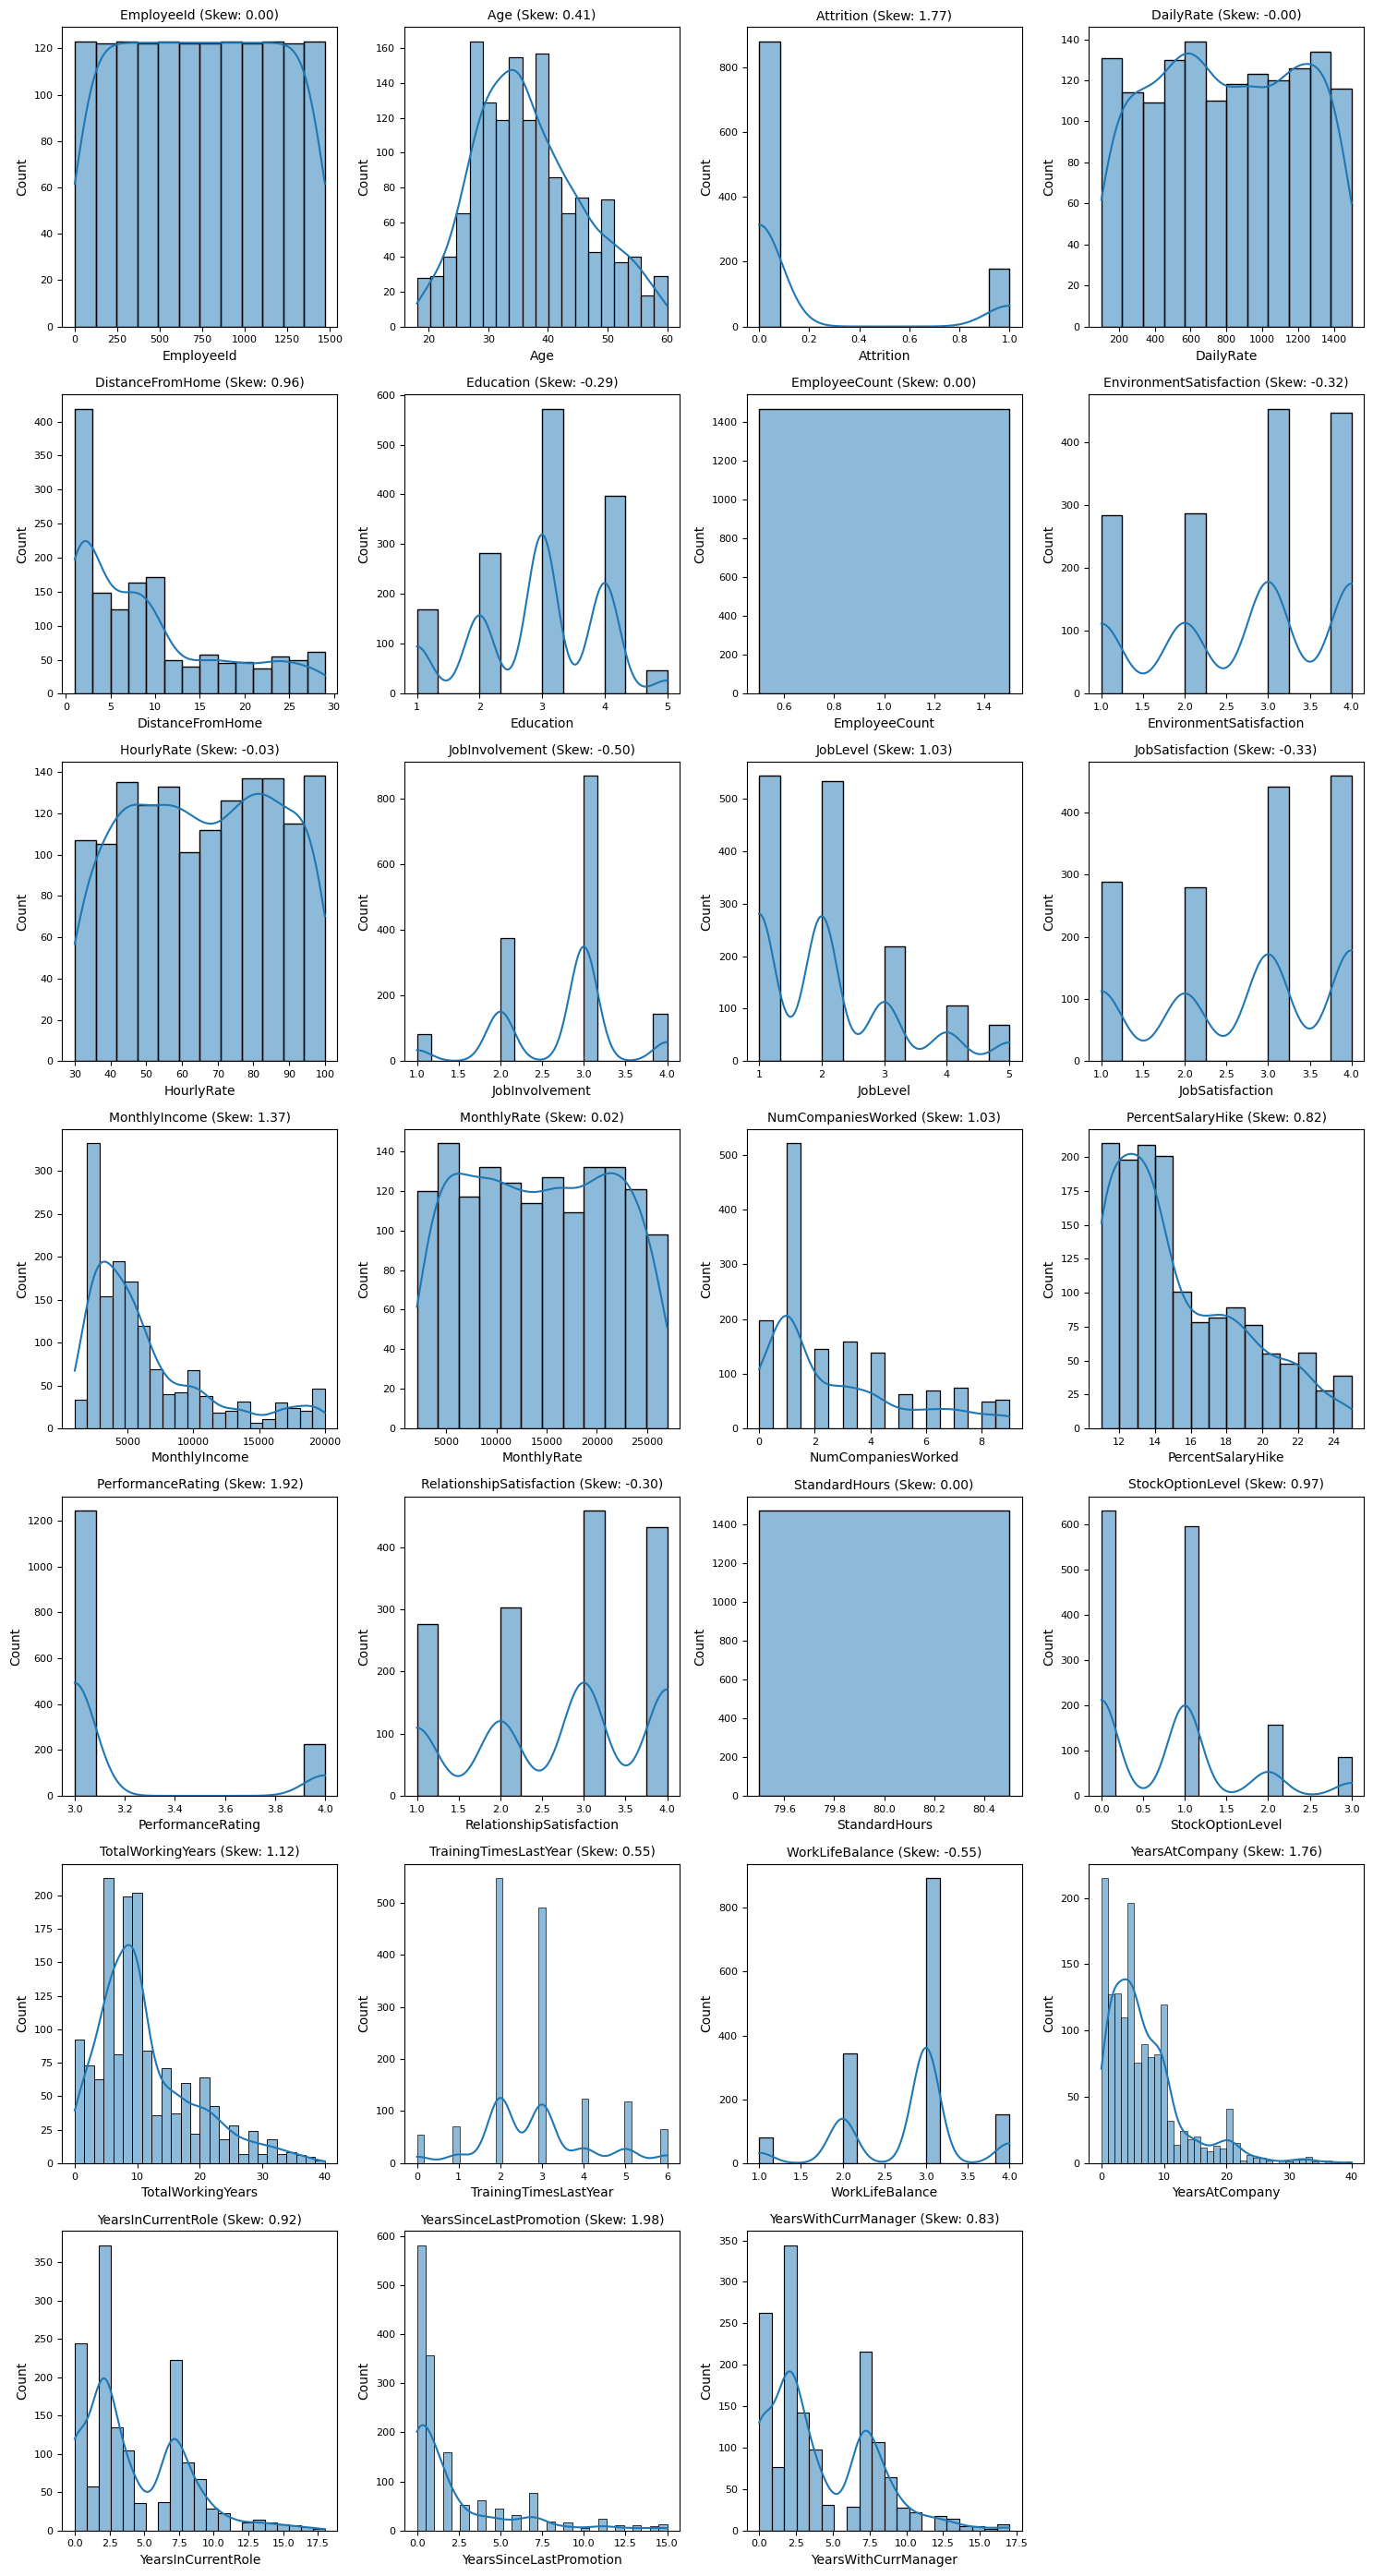

In [134]:
# Pilih hanya kolom numerik
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols = len(numerical_cols)
ncols = min(num_cols, 4)
nrows = (num_cols + ncols - 1) // ncols

# Figure dan Axes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'{col} (Skew: {df[col].skew():.2f})', fontsize=10)
    ax.tick_params(axis='both', labelsize=8)

if num_cols < len(axes):
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Insight:

- Skewness Tinggi: Beberapa kolom menunjukkan skewness yang cukup tinggi (nilai absolut skewness jauh dari 0). Contohnya :

MonthlyIncome : Right-skewed, artinya sebagian besar karyawan memiliki gaji yang lebih rendah, dengan beberapa karyawan bergaji tinggi

YearsAtCompany : Right-skewed, banyak karyawan yang bekerja sebentar, dengan beberapa yang bekerja sangat lama.

TotalWorkingYears : Right-skewed, pola serupa dengan YearsAtCompany.


- Distribusi Tidak Normal: Banyak kolom tidak mengikuti distribusi normal (berbentuk lonceng). Ini bisa menjadi pertimbangan jika ingin menggunakan model statistik atau machine learning yang mengasumsikan normalitas.

- Potensi Outlier: Distribusi yang sangat skewed seringkali mengindikasikan adanya potensi outlier di ekor yang panjang.

- Distribusi Diskret: Beberapa kolom (seperti kolom dengan skala rating 1-4 atau jumlah tahun) memiliki distribusi diskret, yang memang sesuai dengan sifat datanya.

### Identifikasi outliers

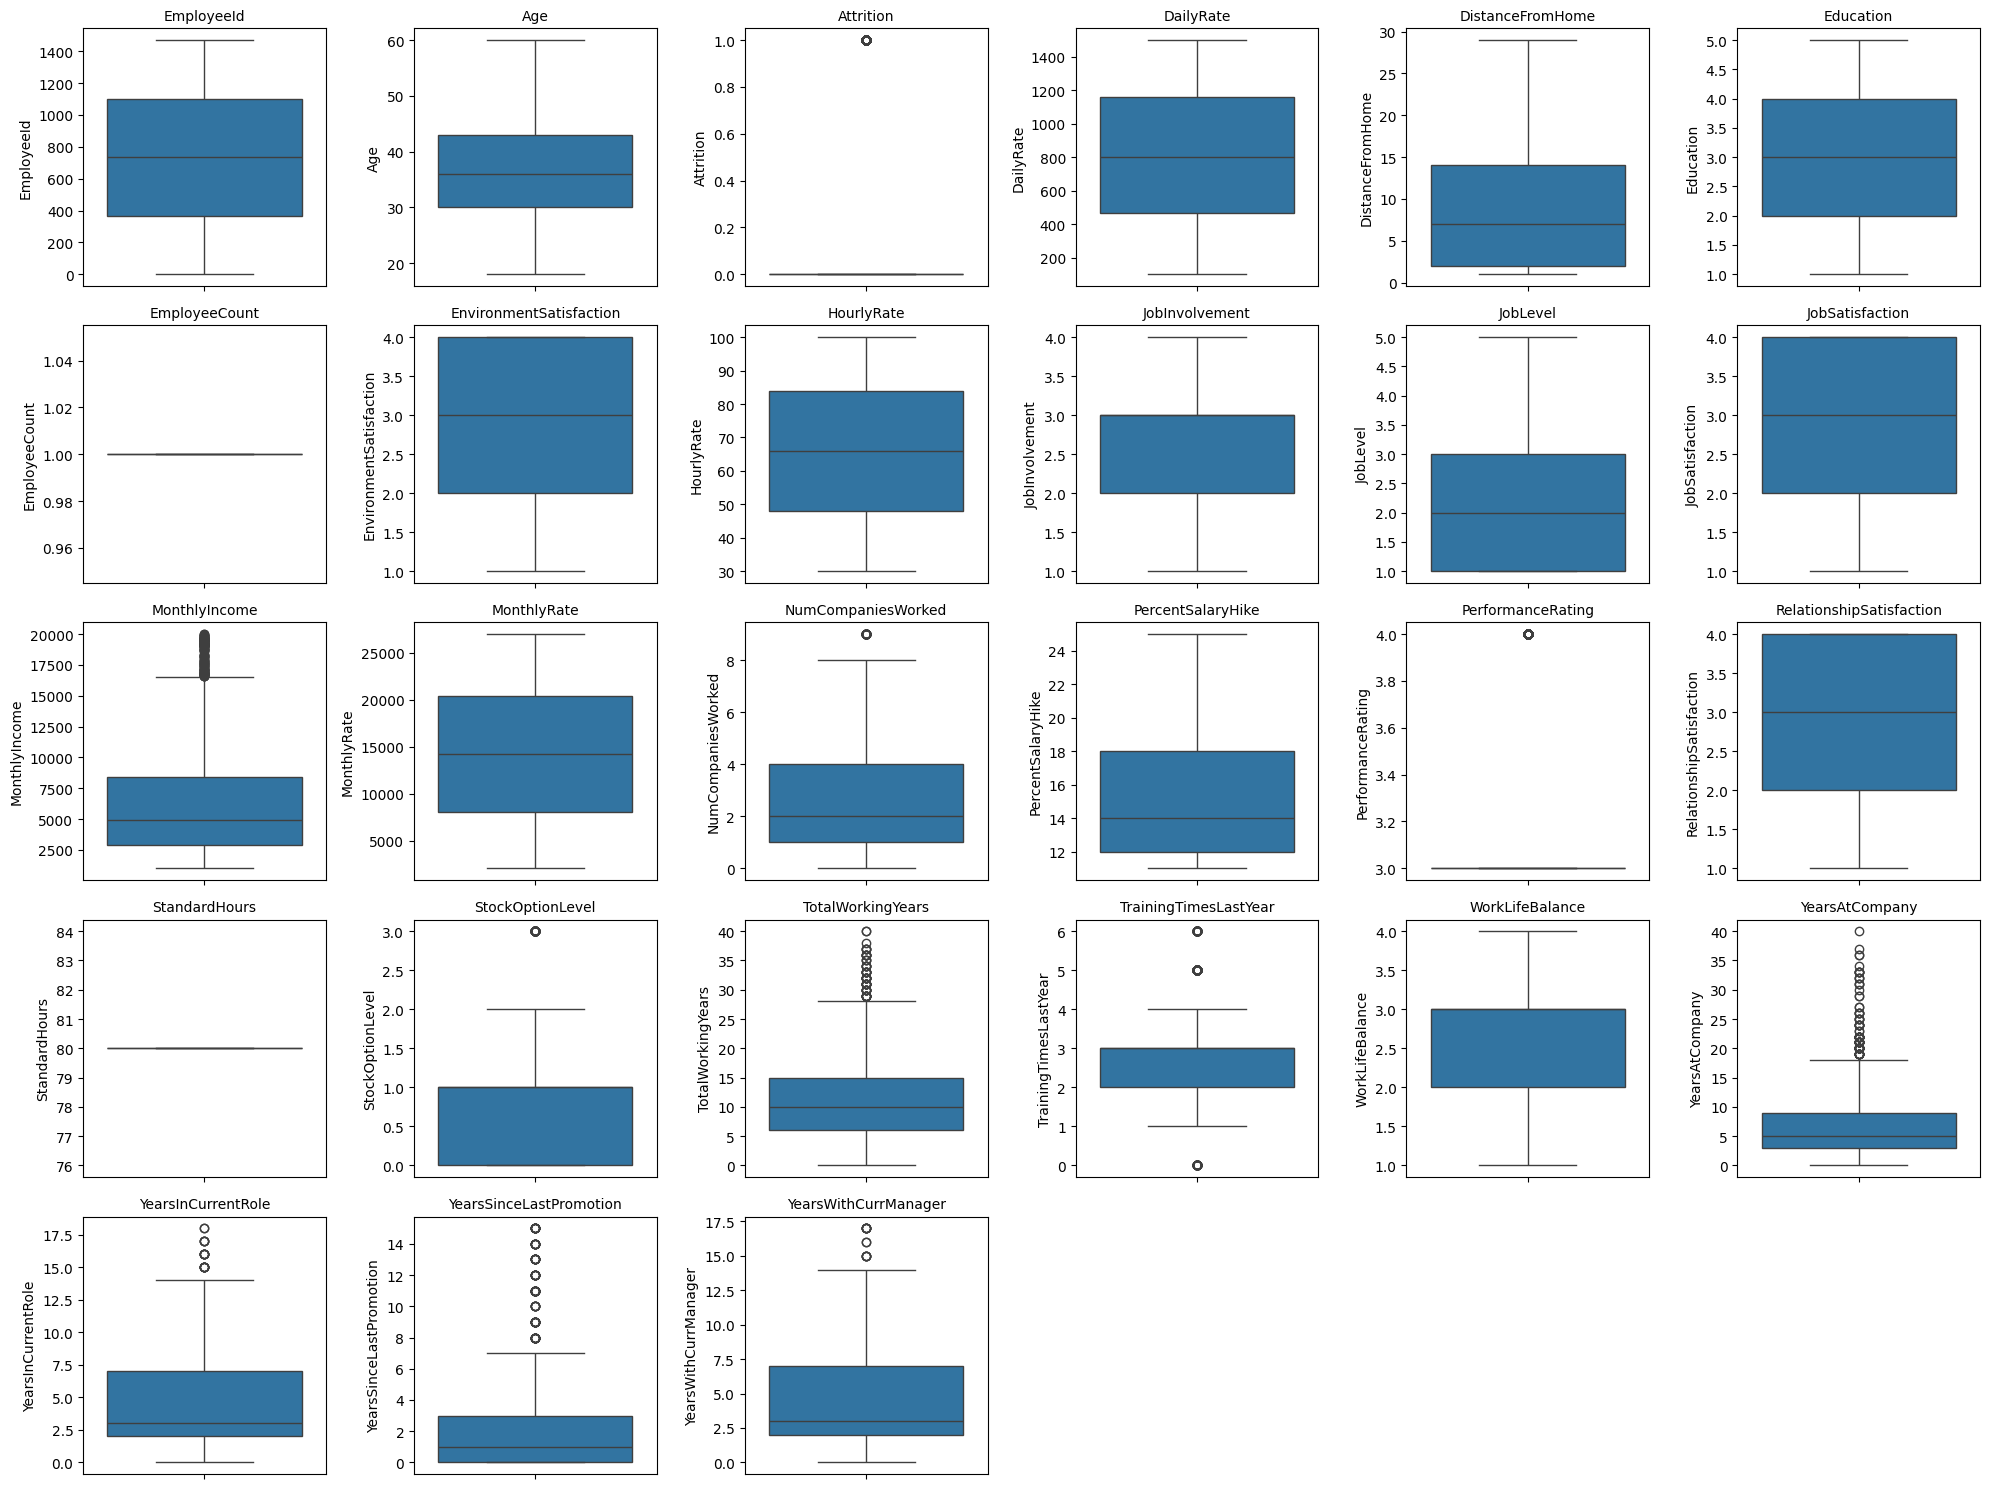

In [135]:
# Dapatkan semua kolom numerik
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Buat box plot untuk setiap kolom numerik
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 6, i)
    sns.boxplot(y=df[col])
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.show()

Insight :
- Potensi Outlier: Banyak kolom terlihat memiliki titik-titik di luar whisker, yang mengindikasikan adanya potensi outlier. Contohnya pada kolom seperti MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, dan YearsWithCurrManager.
- Penanganan Outlier perlu mempertimbangkan apakah akan menghapus, mentransformasi, atau membiarkannya. Hal ini tergantung pada kepentingan data dan model yang akan digunakan untuk mencapai tujuan.

###Hubungan antar kolom

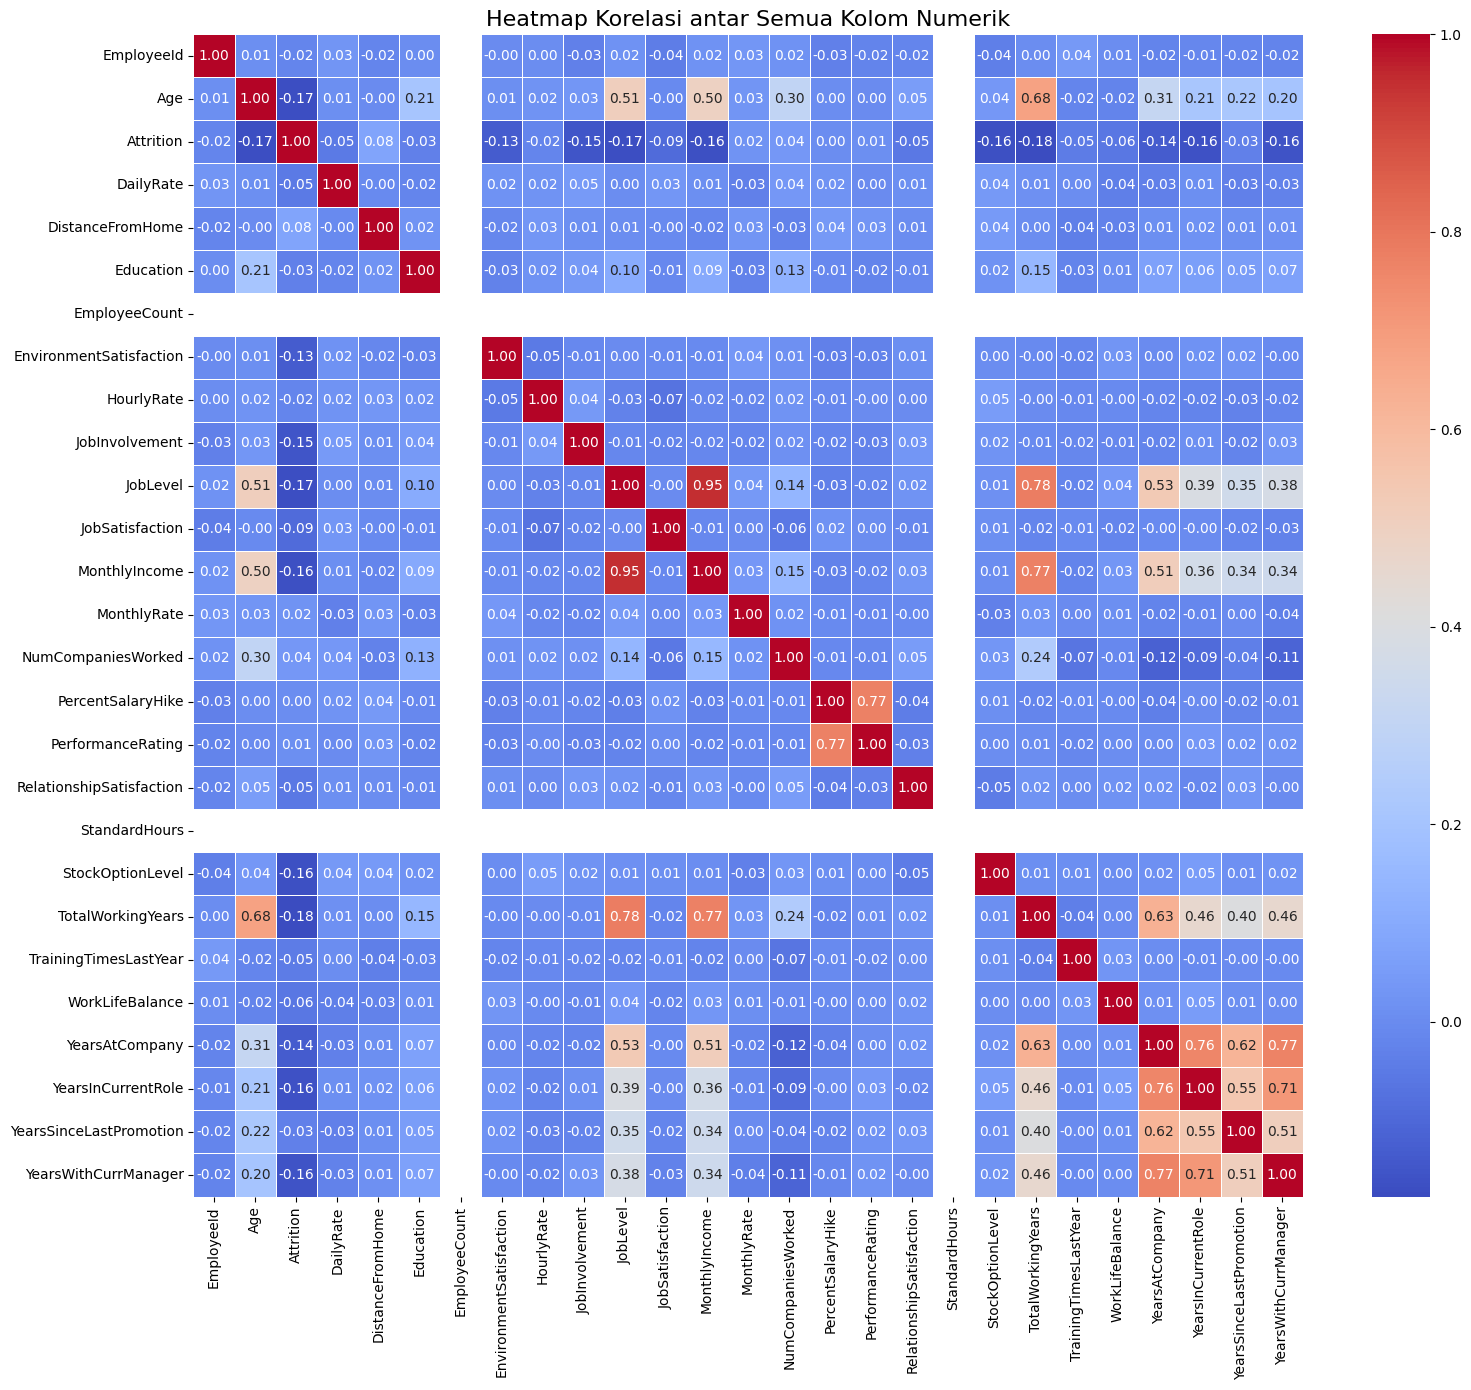

In [136]:
# Pilih hanya kolom numerik
numerical_cols = df.select_dtypes(include=np.number)

# Hitung matriks korelasi
correlation_matrix = numerical_cols.corr()

# Buat heatmap korelasi
plt.figure(figsize=(16, 14))  # Ukuran figure disesuaikan agar lebih luas
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi antar Semua Kolom Numerik', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [137]:
# Pilih hanya kolom numerik (penting untuk kovariansi)
numerical_cols = df.select_dtypes(include=np.number)

# Hitung matriks kovariansi
covariance_matrix = numerical_cols.cov()

# Tampilkan matriks kovariansi
print("Matriks Kovariansi:\n", covariance_matrix)

Matriks Kovariansi:
                              EmployeeId           Age   Attrition  \
EmployeeId                180197.500000     34.283867   -2.871887   
Age                           34.283867     83.455049   -0.607362   
Attrition                     -2.871887     -0.607362    0.140696   
DailyRate                   4550.304289     39.298434   -7.966049   
DistanceFromHome             -62.175970     -0.124873    0.235470   
Education                      1.076242      1.946390   -0.012624   
EmployeeCount                  0.000000      0.000000    0.000000   
EnvironmentSatisfaction       -0.844452      0.101319   -0.054463   
HourlyRate                    34.805310      4.510422   -0.133601   
JobInvolvement                -9.875085      0.193841   -0.039703   
JobLevel                       9.568414      5.153276   -0.072131   
JobSatisfaction              -19.789312     -0.049285   -0.037999   
MonthlyIncome              38519.766848  21412.198982 -296.866781   
MonthlyRate  

Insight Kovariansi dengan Kolom 'Attrition':

BISA DIHILANGKAN
- EmployeeId: Kovariansi -2.87. Nilai negatif kecil menunjukkan hubungan terbalik yang sangat lemah. ID karyawan kemungkinan tidak relevan dengan attrition.
- DailyRate: Kovariansi -7.97. Nilai negatif kecil menunjukkan hubungan terbalik yang sangat lemah. Gaji harian mungkin tidak menjadi faktor utama attrition secara linear.
- DistanceFromHome: Kovariansi 0.24. Nilai positif sangat kecil menunjukkan hubungan positif yang sangat lemah. Jarak dari rumah mungkin bukan faktor linear yang kuat.
- Education: Kovariansi -0.01. Nilai negatif sangat kecil menunjukkan hubungan terbalik yang sangat lemah. Tingkat pendidikan mungkin bukan faktor linear yang kuat.
- HourlyRate: Kovariansi -0.13. Nilai negatif sangat kecil menunjukkan hubungan terbalik yang sangat lemah. Gaji per jam mungkin bukan faktor utama attrition secara linear.
- MonthlyRate: Kovariansi 61.60. Nilai positif kecil menunjukkan hubungan positif yang lemah. Tarif bulanan mungkin bukan faktor utama attrition.
- NumCompaniesWorked: Kovariansi 0.04. Nilai positif sangat kecil menunjukkan hubungan positif yang sangat lemah. Jumlah perusahaan tempat bekerja sebelumnya mungkin bukan faktor linear yang kuat.
- PercentSalaryHike: Kovariansi 0.01. Nilai positif sangat kecil menunjukkan hubungan positif yang sangat lemah. Persentase kenaikan gaji tahun lalu mungkin bukan faktor linear yang kuat.
- PerformanceRating: Kovariansi 0.001. Nilai positif sangat kecil menunjukkan hubungan positif yang sangat lemah. Penilaian kinerja mungkin bukan faktor linear yang kuat.
- RelationshipSatisfaction: Kovariansi -0.02. Nilai negatif sangat kecil menunjukkan hubungan terbalik yang sangat lemah. Kepuasan hubungan kerja mungkin bukan faktor linear yang kuat.
- TrainingTimesLastYear: Kovariansi -0.02. Nilai negatif sangat kecil menunjukkan hubungan terbalik yang sangat lemah. Jumlah pelatihan yang diikuti tahun lalu mungkin bukan faktor linear yang kuat.
- WorkLifeBalance: Kovariansi -0.02. Nilai negatif sangat kecil menunjukkan hubungan terbalik yang sangat lemah. Keseimbangan kerja-hidup mungkin bukan faktor linear yang kuat.
- YearsSinceLastPromotion: Kovariansi -0.04. Nilai negatif sangat kecil menunjukkan hubungan terbalik yang sangat lemah. Tahun sejak promosi terakhir mungkin bukan faktor linear yang kuat.
- EmployeeCount HourlyRate tidak terdapat nilai (0).

DIPERTIMBANGKAN
- Age: Kovariansi -0.61. Nilai negatif kecil menunjukkan bahwa karyawan yang lebih tua sedikit cenderung mengalami attrition yang lebih rendah.
- EnvironmentSatisfaction: Kovariansi -0.05. Nilai negatif kecil menunjukkan bahwa kepuasan lingkungan yang lebih tinggi sedikit cenderung berkorelasi dengan attrition yang lebih rendah.
- JobInvolvement: Kovariansi -0.04. Nilai negatif sangat kecil menunjukkan bahwa keterlibatan kerja yang lebih tinggi sedikit cenderung berkorelasi dengan attrition yang lebih rendah.
- JobLevel: Kovariansi -0.07. Nilai negatif kecil menunjukkan bahwa tingkat pekerjaan yang lebih tinggi sedikit cenderung berkorelasi dengan attrition yang lebih rendah.
- JobSatisfaction: Kovariansi -0.04. Nilai negatif sangat kecil menunjukkan bahwa kepuasan kerja yang lebih tinggi sedikit cenderung berkorelasi dengan attrition yang lebih rendah.
- MonthlyIncome: Kovariansi -296.87. Nilai negatif yang lebih besar (dibandingkan yang lain) menunjukkan bahwa gaji bulanan yang lebih tinggi cenderung berkorelasi dengan attrition yang lebih rendah. Ini adalah salah satu faktor numerik yang lebih kuat berdasarkan kovariansi.
- StockOptionLevel: Kovariansi -0.05. Nilai negatif kecil menunjukkan bahwa tingkat opsi saham yang lebih tinggi sedikit cenderung berkorelasi dengan attrition yang lebih rendah.
- TotalWorkingYears: Kovariansi -0.53. Nilai negatif kecil menunjukkan bahwa total tahun bekerja yang lebih banyak sedikit cenderung berkorelasi dengan attrition yang lebih rendah.
- YearsAtCompany: Kovariansi -0.32. Nilai negatif kecil menunjukkan bahwa tahun bekerja di perusahaan saat ini yang lebih banyak sedikit cenderung berkorelasi dengan attrition yang lebih rendah.
- YearsInCurrentRole: Kovariansi -0.22. Nilai negatif kecil menunjukkan bahwa tahun dalam peran saat ini yang lebih banyak sedikit cenderung berkorelasi dengan attrition yang lebih rendah.
- YearsWithCurrManager: Kovariansi -0.21. Nilai negatif kecil menunjukkan bahwa tahun bersama manajer saat ini yang lebih banyak sedikit cenderung berkorelasi dengan attrition yang lebih rendah.

Adapun akan dicek kembali dari hasil pre processing.

## Data Preparation / Preprocessing

###Encoding Data Kategorikal

In [138]:
# Mapping dictionary untuk setiap kolom
business_travel_mapping = {'Travel_Frequently': 1, 'Travel_Rarely': 2, 'Non-Travel': 3}
department_mapping = {'Human Resources': 1, 'Research & Development': 2, 'Sales': 3}
education_field_mapping = {'Other': 1, 'Medical': 2, 'Life Sciences': 3, 'Marketing': 4, 'Technical Degree': 5, 'Human Resources': 6}
gender_mapping = {'Male': 1, 'Female': 2}
job_role_mapping = {'Human Resources': 1, 'Healthcare Representative': 2, 'Research Scientist': 3, 'Sales Executive': 4, 'Manager': 5, 'Laboratory Technician': 6, 'Research Director': 7, 'Manufacturing Director': 8, 'Sales Representative': 9}
marital_status_mapping = {'Married': 1, 'Single': 2, 'Divorced': 3}
over18_mapping = {'Y': 1}
overtime_mapping = {'Yes': 1, 'No': 0}

# Terapkan mapping ke kolom asli, sehingga nilai aslinya tergantikan
df['BusinessTravel'] = df['BusinessTravel'].map(business_travel_mapping)
df['Department'] = df['Department'].map(department_mapping)
df['EducationField'] = df['EducationField'].map(education_field_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)
df['JobRole'] = df['JobRole'].map(job_role_mapping)
df['MaritalStatus'] = df['MaritalStatus'].map(marital_status_mapping)
df['Over18'] = df['Over18'].map(over18_mapping)
df['OverTime'] = df['OverTime'].map(overtime_mapping)

# Tampilkan beberapa baris pertama DataFrame yang telah diubah
print("Beberapa baris pertama DataFrame setelah encoding (kolom asli diganti):")
print(df[[
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'Over18',
    'OverTime'
]].head())

# Tampilkan informasi DataFrame untuk memverifikasi tipe data
print("\nInformasi DataFrame setelah encoding:")
print(df.info())

Beberapa baris pertama DataFrame setelah encoding (kolom asli diganti):
   BusinessTravel  Department  EducationField  Gender  JobRole  MaritalStatus  \
0               1           1               1       1        1              1   
1               2           2               2       2        2              1   
2               2           2               3       1        3              1   
3               1           3               4       2        4              1   
4               2           2               2       2        3              1   

   Over18  OverTime  
0       1         1  
1       1         0  
2       1         1  
3       1         0  
4       1         0  

Informasi DataFrame setelah encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64 

In [139]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,1,1444,1,1,4,1,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,2,1141,2,11,2,2,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,2,1323,2,4,4,3,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,1,555,3,26,3,4,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,2,1194,2,2,4,2,1,...,2,80,3,20,2,3,5,3,0,2


### Menangani Missing Value

In [140]:
# Hitung modus kolom 'Attrition'
modus_attrition = df['Attrition'].mode()[0]

# Isi missing value dengan modus
df['Attrition'].fillna(modus_attrition, inplace=True)

<ipython-input-140-1471077342c6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attrition'].fillna(modus_attrition, inplace=True)


In [141]:
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


### Ubah Tipe Data

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1470 non-null   float64
 3   BusinessTravel            1470 non-null   int64  
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   int64  
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   int64  
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   int64  
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [143]:
df['Attrition'] = df['Attrition'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   EmployeeId                1470 non-null   int64
 1   Age                       1470 non-null   int64
 2   Attrition                 1470 non-null   int64
 3   BusinessTravel            1470 non-null   int64
 4   DailyRate                 1470 non-null   int64
 5   Department                1470 non-null   int64
 6   DistanceFromHome          1470 non-null   int64
 7   Education                 1470 non-null   int64
 8   EducationField            1470 non-null   int64
 9   EmployeeCount             1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

Berdasarkan analisis hasilnya, ada beberapa kolom terbagi menjadi data ordinal dan nominal.

Adapun data ordinal adalah sebagai berikut ['Education', 'EnvironmentSatisfaction','JobInvolvement', 'JobLevel','JobSatisfaction', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel','WorkLifeBalance'].

Adapun data nominal adalah sebagai berikut ['Attrition', 'BusinessTravel','Department', 'EducationField','Gender', 'JobRole','MaritalStatus', 'Over18','OverTime'].

In [144]:
# Daftar kolom ordinal
ordinal_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
                'StockOptionLevel', 'WorkLifeBalance']

# Daftar kolom nominal
nominal_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

# Gabungkan kedua daftar kolom
cols_to_category = ordinal_cols + nominal_cols

def ubah_ke_category(df, cols_to_category):
    for col in cols_to_category:
        if col in df.columns:
            df[col] = df[col].astype('category')
        else:
            print(f"Kolom '{col}' tidak ditemukan dalam DataFrame.")
    return df

df = ubah_ke_category(df, cols_to_category)
print(df.dtypes)

EmployeeId                     int64
Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EmployeeCount                  int64
EnvironmentSatisfaction     category
Gender                      category
HourlyRate                     int64
JobInvolvement              category
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
PerformanceRating           category
RelationshipSatisfaction    category
StandardHours                  int64
S

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeId                1470 non-null   int64   
 1   Age                       1470 non-null   int64   
 2   Attrition                 1470 non-null   category
 3   BusinessTravel            1470 non-null   category
 4   DailyRate                 1470 non-null   int64   
 5   Department                1470 non-null   category
 6   DistanceFromHome          1470 non-null   int64   
 7   Education                 1470 non-null   category
 8   EducationField            1470 non-null   category
 9   EmployeeCount             1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   category
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   catego

###Analisis Univariate

#### EDA - Analisis Nilai Numerik

In [146]:
numerical_cols = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'EmployeeCount',
    'HourlyRate',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'StandardHours',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

In [147]:
# Contoh analisis: Rata-rata (mean) untuk setiap kolom numerik
print("--- Rata-rata (Mean) ---")
for col in numerical_cols:
    print(f"{col}: {df[col].mean()}")

# Contoh analisis: Standar deviasi (std) untuk setiap kolom numerik
print("\n--- Standar Deviasi (Standard Deviation) ---")
for col in numerical_cols:
    print(f"{col}: {df[col].std()}")

# Contoh analisis: Statistik deskriptif lengkap untuk SEMUA kolom numerik
print("\n--- Statistik Deskriptif untuk Semua Kolom Numerik ---")
df[numerical_cols].describe()

--- Rata-rata (Mean) ---
Age: 36.923809523809524
DailyRate: 802.4857142857143
DistanceFromHome: 9.19251700680272
EmployeeCount: 1.0
HourlyRate: 65.89115646258503
MonthlyIncome: 6502.931292517007
MonthlyRate: 14313.103401360544
NumCompaniesWorked: 2.6931972789115646
PercentSalaryHike: 15.209523809523809
StandardHours: 80.0
TotalWorkingYears: 11.279591836734694
TrainingTimesLastYear: 2.7993197278911564
YearsAtCompany: 7.0081632653061225
YearsInCurrentRole: 4.229251700680272
YearsSinceLastPromotion: 2.1877551020408164
YearsWithCurrManager: 4.12312925170068

--- Standar Deviasi (Standard Deviation) ---
Age: 9.13537348913673
DailyRate: 403.50909994352816
DistanceFromHome: 8.10686443566608
EmployeeCount: 0.0
HourlyRate: 20.329427593996172
MonthlyIncome: 4707.956783097998
MonthlyRate: 7117.786044059977
NumCompaniesWorked: 2.4980090060707503
PercentSalaryHike: 3.6599377165396305
StandardHours: 0.0
TotalWorkingYears: 7.780781675514998
TrainingTimesLastYear: 1.289270620795846
YearsAtCompany: 6.1

,Age,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,65.891156,6502.931293,14313.103401,2.693197,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,48.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,66.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,83.750000,8379.000000,20461.500000,4.000000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


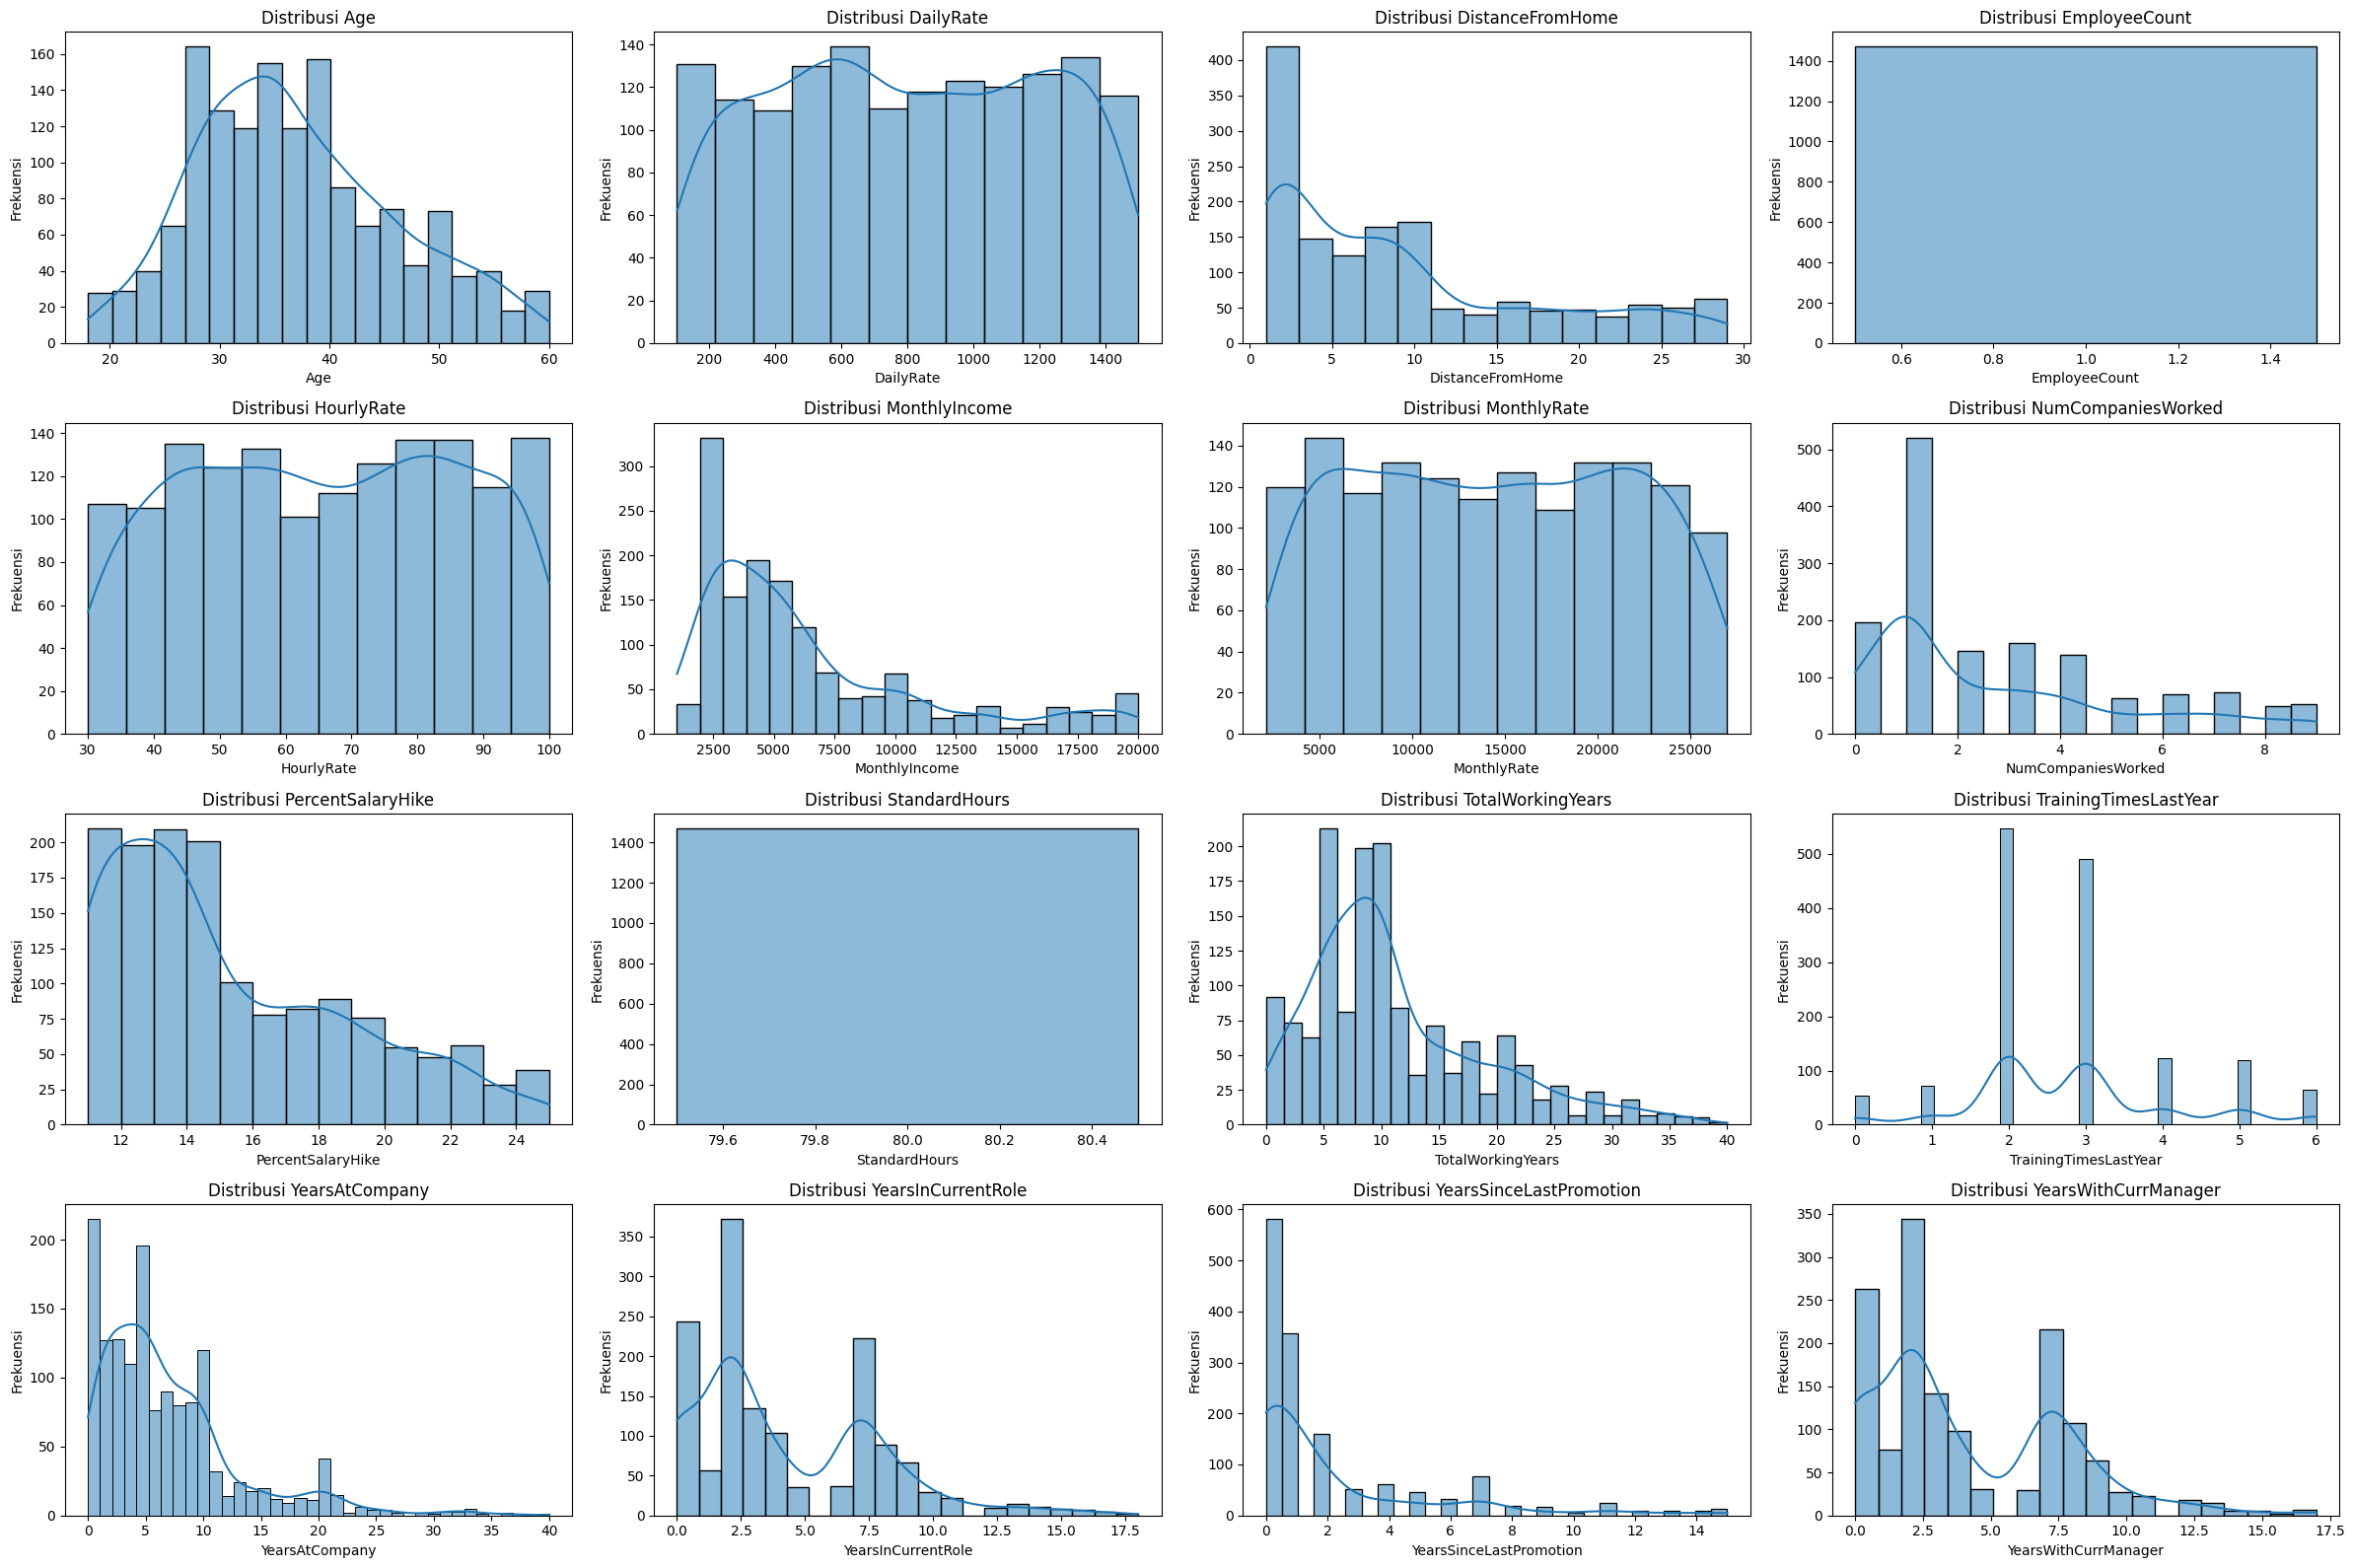

In [148]:
def plot_numerical_histograms(df, numerical_cols, cols_per_row=4):
    n_cols = len(numerical_cols)
    n_rows = int(np.ceil(n_cols / cols_per_row))

    fig, axes = plt.subplots(nrows=n_rows, ncols=cols_per_row, figsize=(cols_per_row * 6, n_rows * 4))

    for i, col in enumerate(numerical_cols):
        row_idx = i // cols_per_row
        col_idx = i % cols_per_row

        if n_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]

        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(f'Distribusi {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frekuensi')

    # Hapus subplot kosong jika ada
    if n_cols < n_rows * cols_per_row:
        for j in range(n_cols, n_rows * cols_per_row):
            if n_rows > 1:
                fig.delaxes(axes.flatten()[j])
            else:
                fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_numerical_histograms(df, numerical_cols)

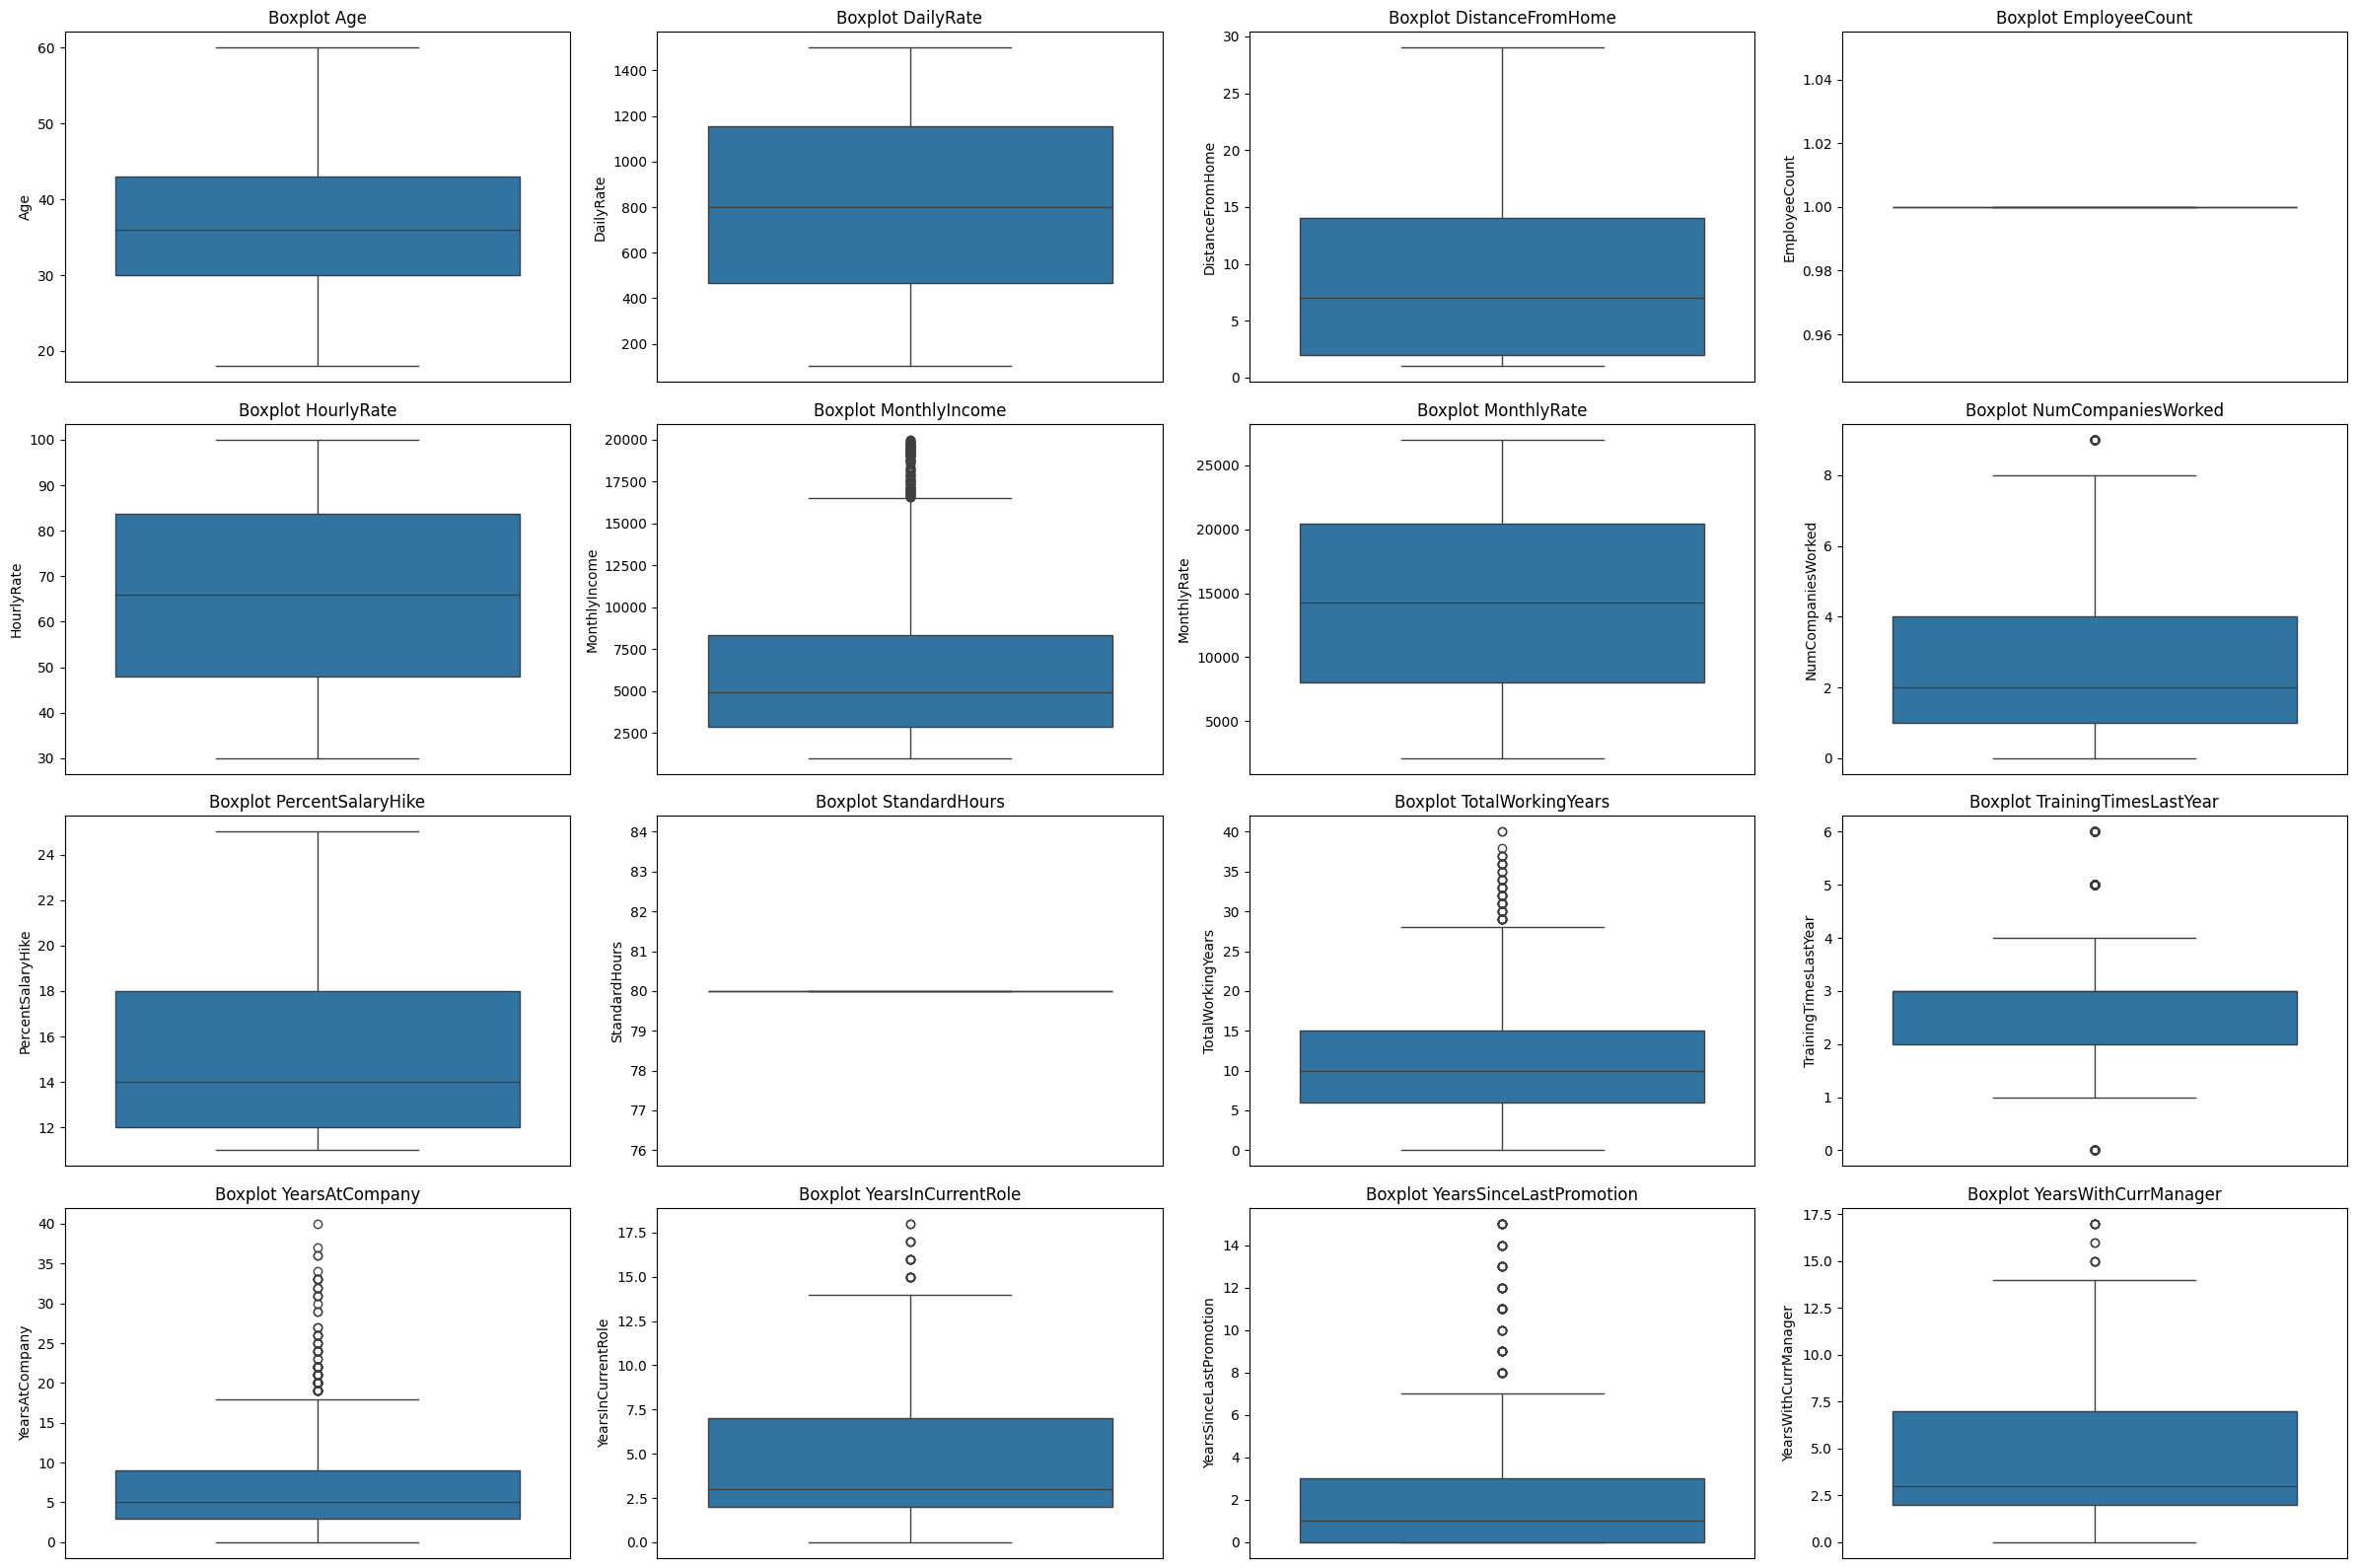

In [149]:
def plot_numerical_boxplots(df, numerical_cols, cols_per_row=4):
    n_cols = len(numerical_cols)
    n_rows = int(np.ceil(n_cols / cols_per_row))

    fig, axes = plt.subplots(nrows=n_rows, ncols=cols_per_row, figsize=(cols_per_row * 6, n_rows * 4))

    for i, col in enumerate(numerical_cols):
        row_idx = i // cols_per_row
        col_idx = i % cols_per_row

        if n_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]

        sns.boxplot(y=df[col], ax=ax)
        ax.set_title(f'Boxplot {col}')
        ax.set_ylabel(col)

        # Kosongkan label x-axis karena tidak relevan untuk boxplot tunggal
        ax.set_xlabel('')
        ax.set_xticks([])

    # Hapus subplot kosong jika ada
    if n_cols < n_rows * cols_per_row:
        for j in range(n_cols, n_rows * cols_per_row):
            if n_rows > 1:
                fig.delaxes(axes.flatten()[j])
            else:
                fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_numerical_boxplots(df, numerical_cols)

#### EDA - Analisis Nilai Kategorikal

In [150]:
categorical_cols = [
    'Attrition',
    'BusinessTravel',
    'Department',
    'Education',
    'EducationField',
    'EnvironmentSatisfaction',
    'Gender',
    'JobInvolvement',
    'JobLevel',
    'JobRole',
    'JobSatisfaction',
    'MaritalStatus',
    'Over18',
    'OverTime',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'WorkLifeBalance'
]

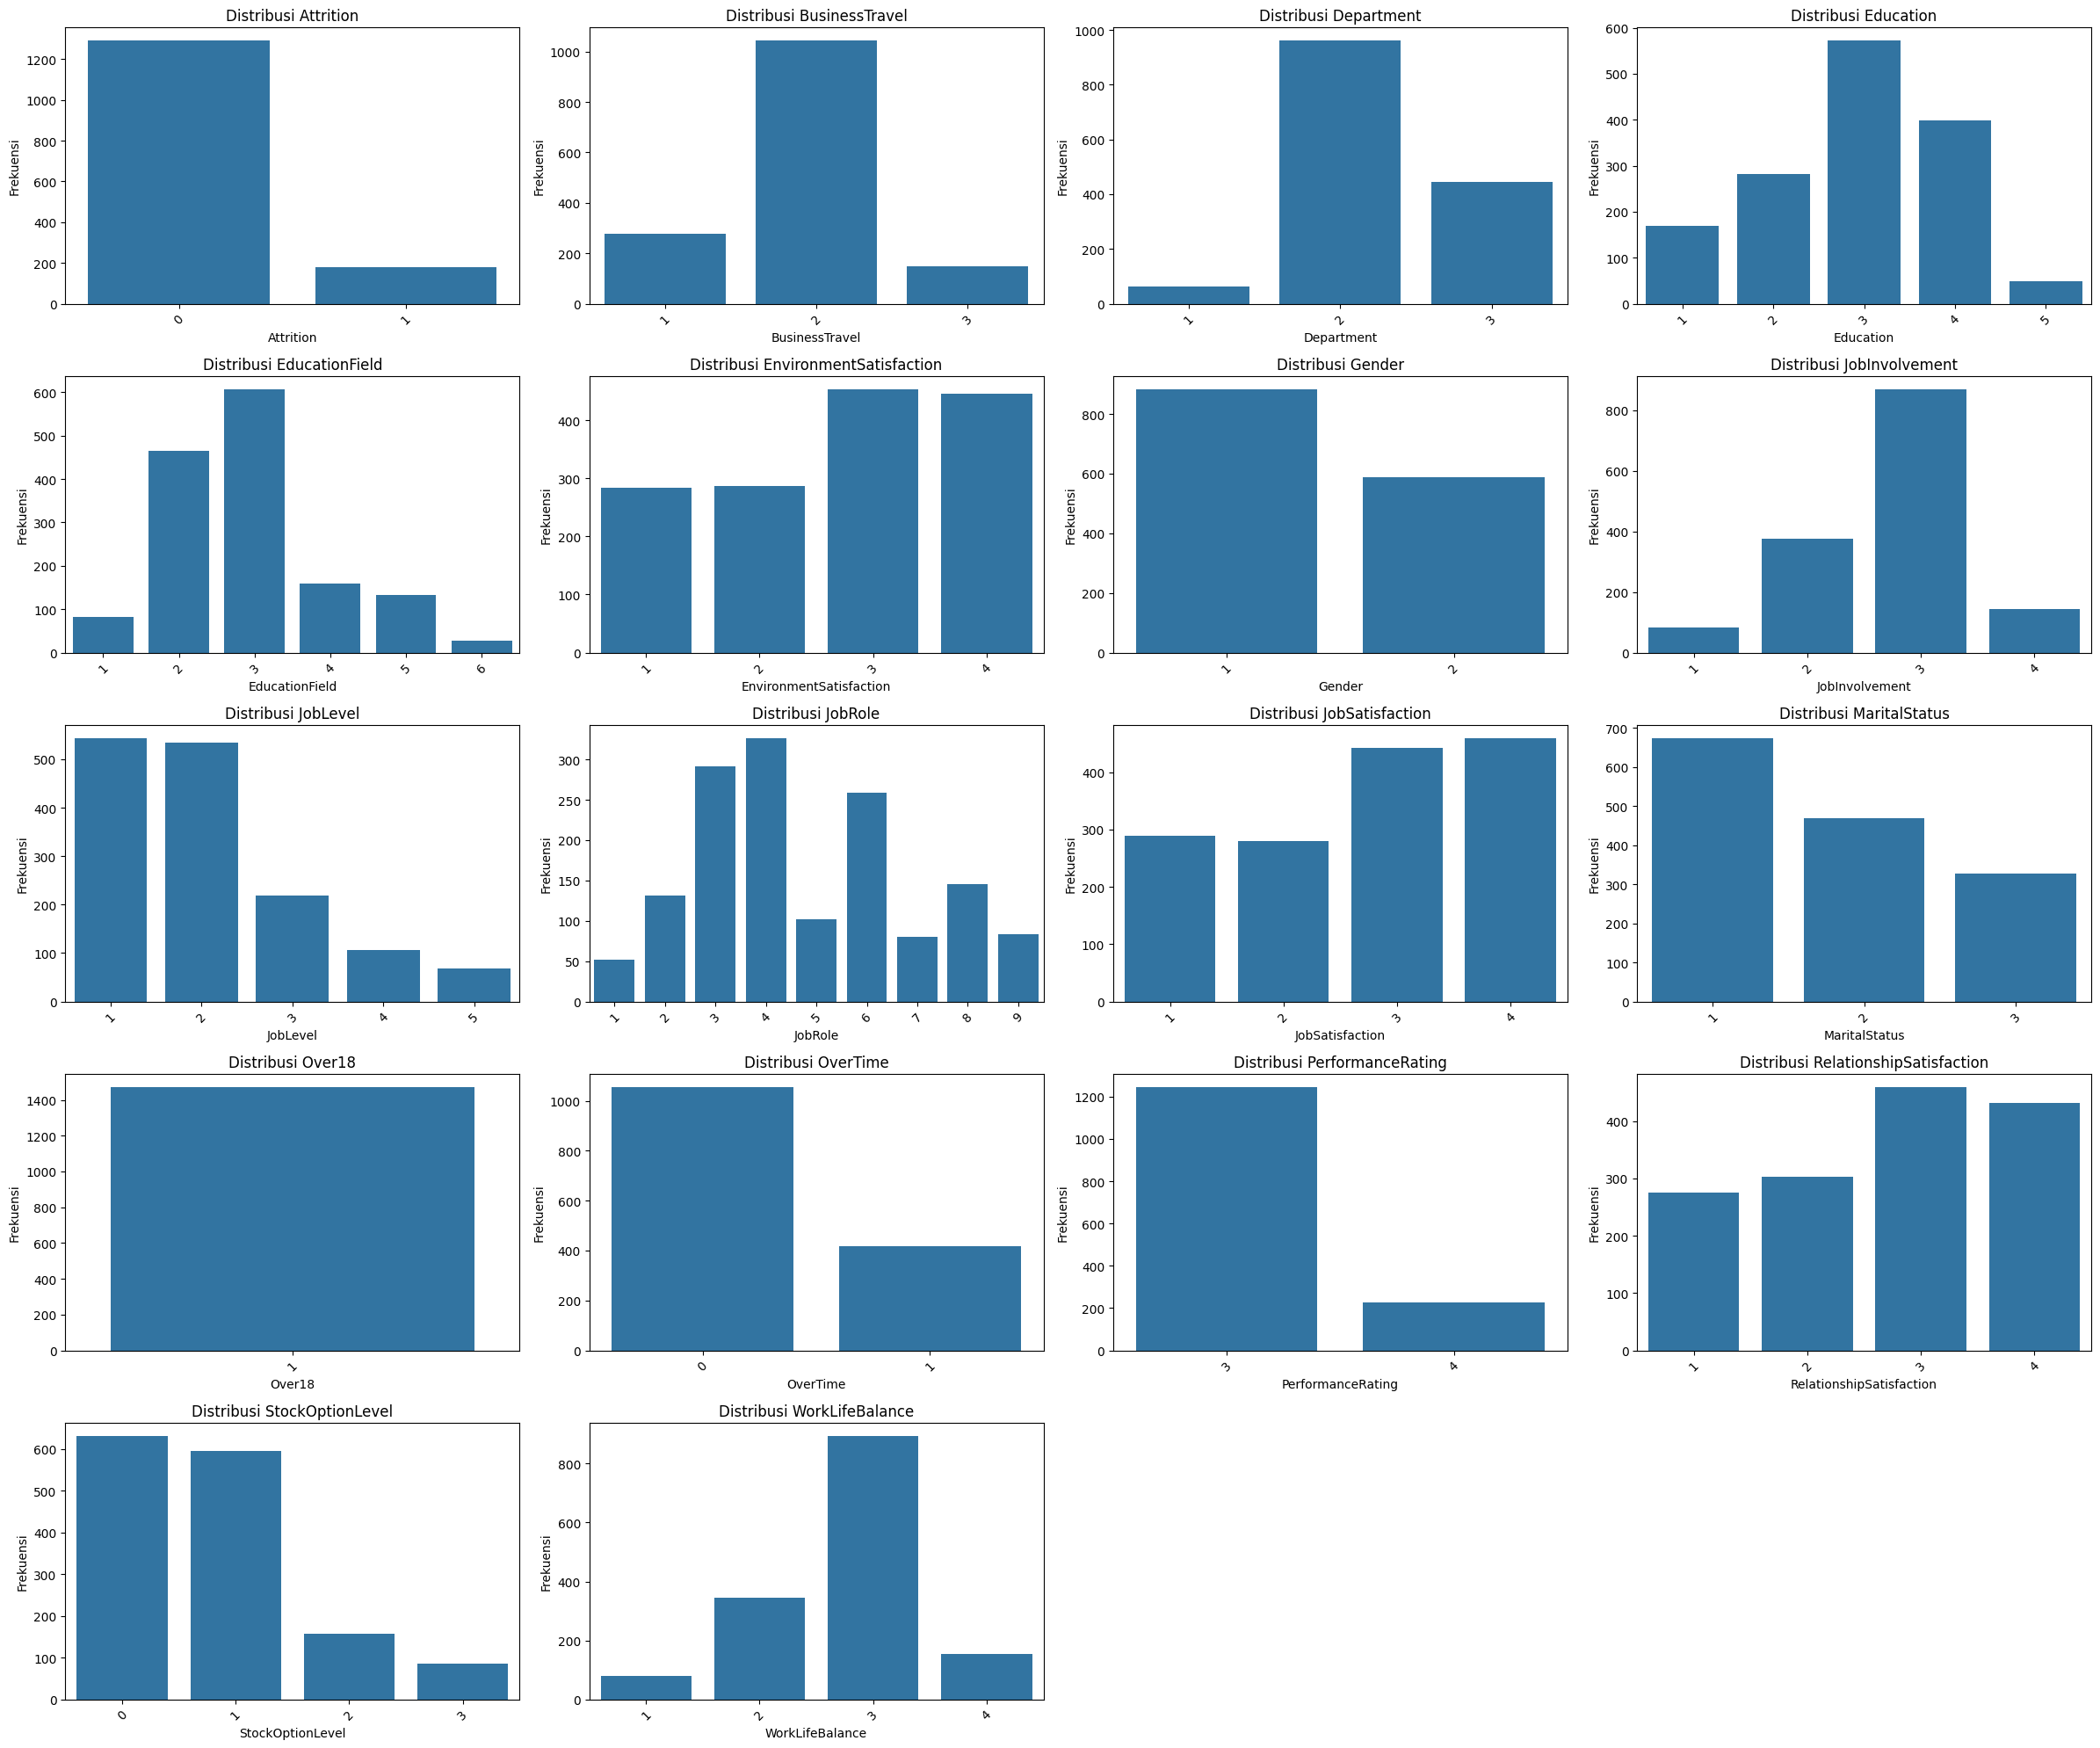

In [151]:
def plot_categorical_bar_charts(df, categorical_cols, cols_per_row=4):
    n_cols = len(categorical_cols)
    n_rows = int(np.ceil(n_cols / cols_per_row))

    fig, axes = plt.subplots(nrows=n_rows, ncols=cols_per_row, figsize=(cols_per_row * 6, n_rows * 4))

    for i, col in enumerate(categorical_cols):
        row_idx = i // cols_per_row
        col_idx = i % cols_per_row

        if n_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]

        # Menghitung frekuensi setiap kategori
        counts = df[col].value_counts()
        sns.barplot(x=counts.index, y=counts.values, ax=ax)

        ax.set_title(f'Distribusi {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frekuensi')
        ax.tick_params(axis='x', rotation=45)  # Rotasi label x jika terlalu panjang

    # Hapus subplot kosong jika ada
    if n_cols < n_rows * cols_per_row:
        for j in range(n_cols, n_rows * cols_per_row):
            if n_rows > 1:
                fig.delaxes(axes.flatten()[j])
            else:
                fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan diagram batang dalam grid
plot_categorical_bar_charts(df, categorical_cols)

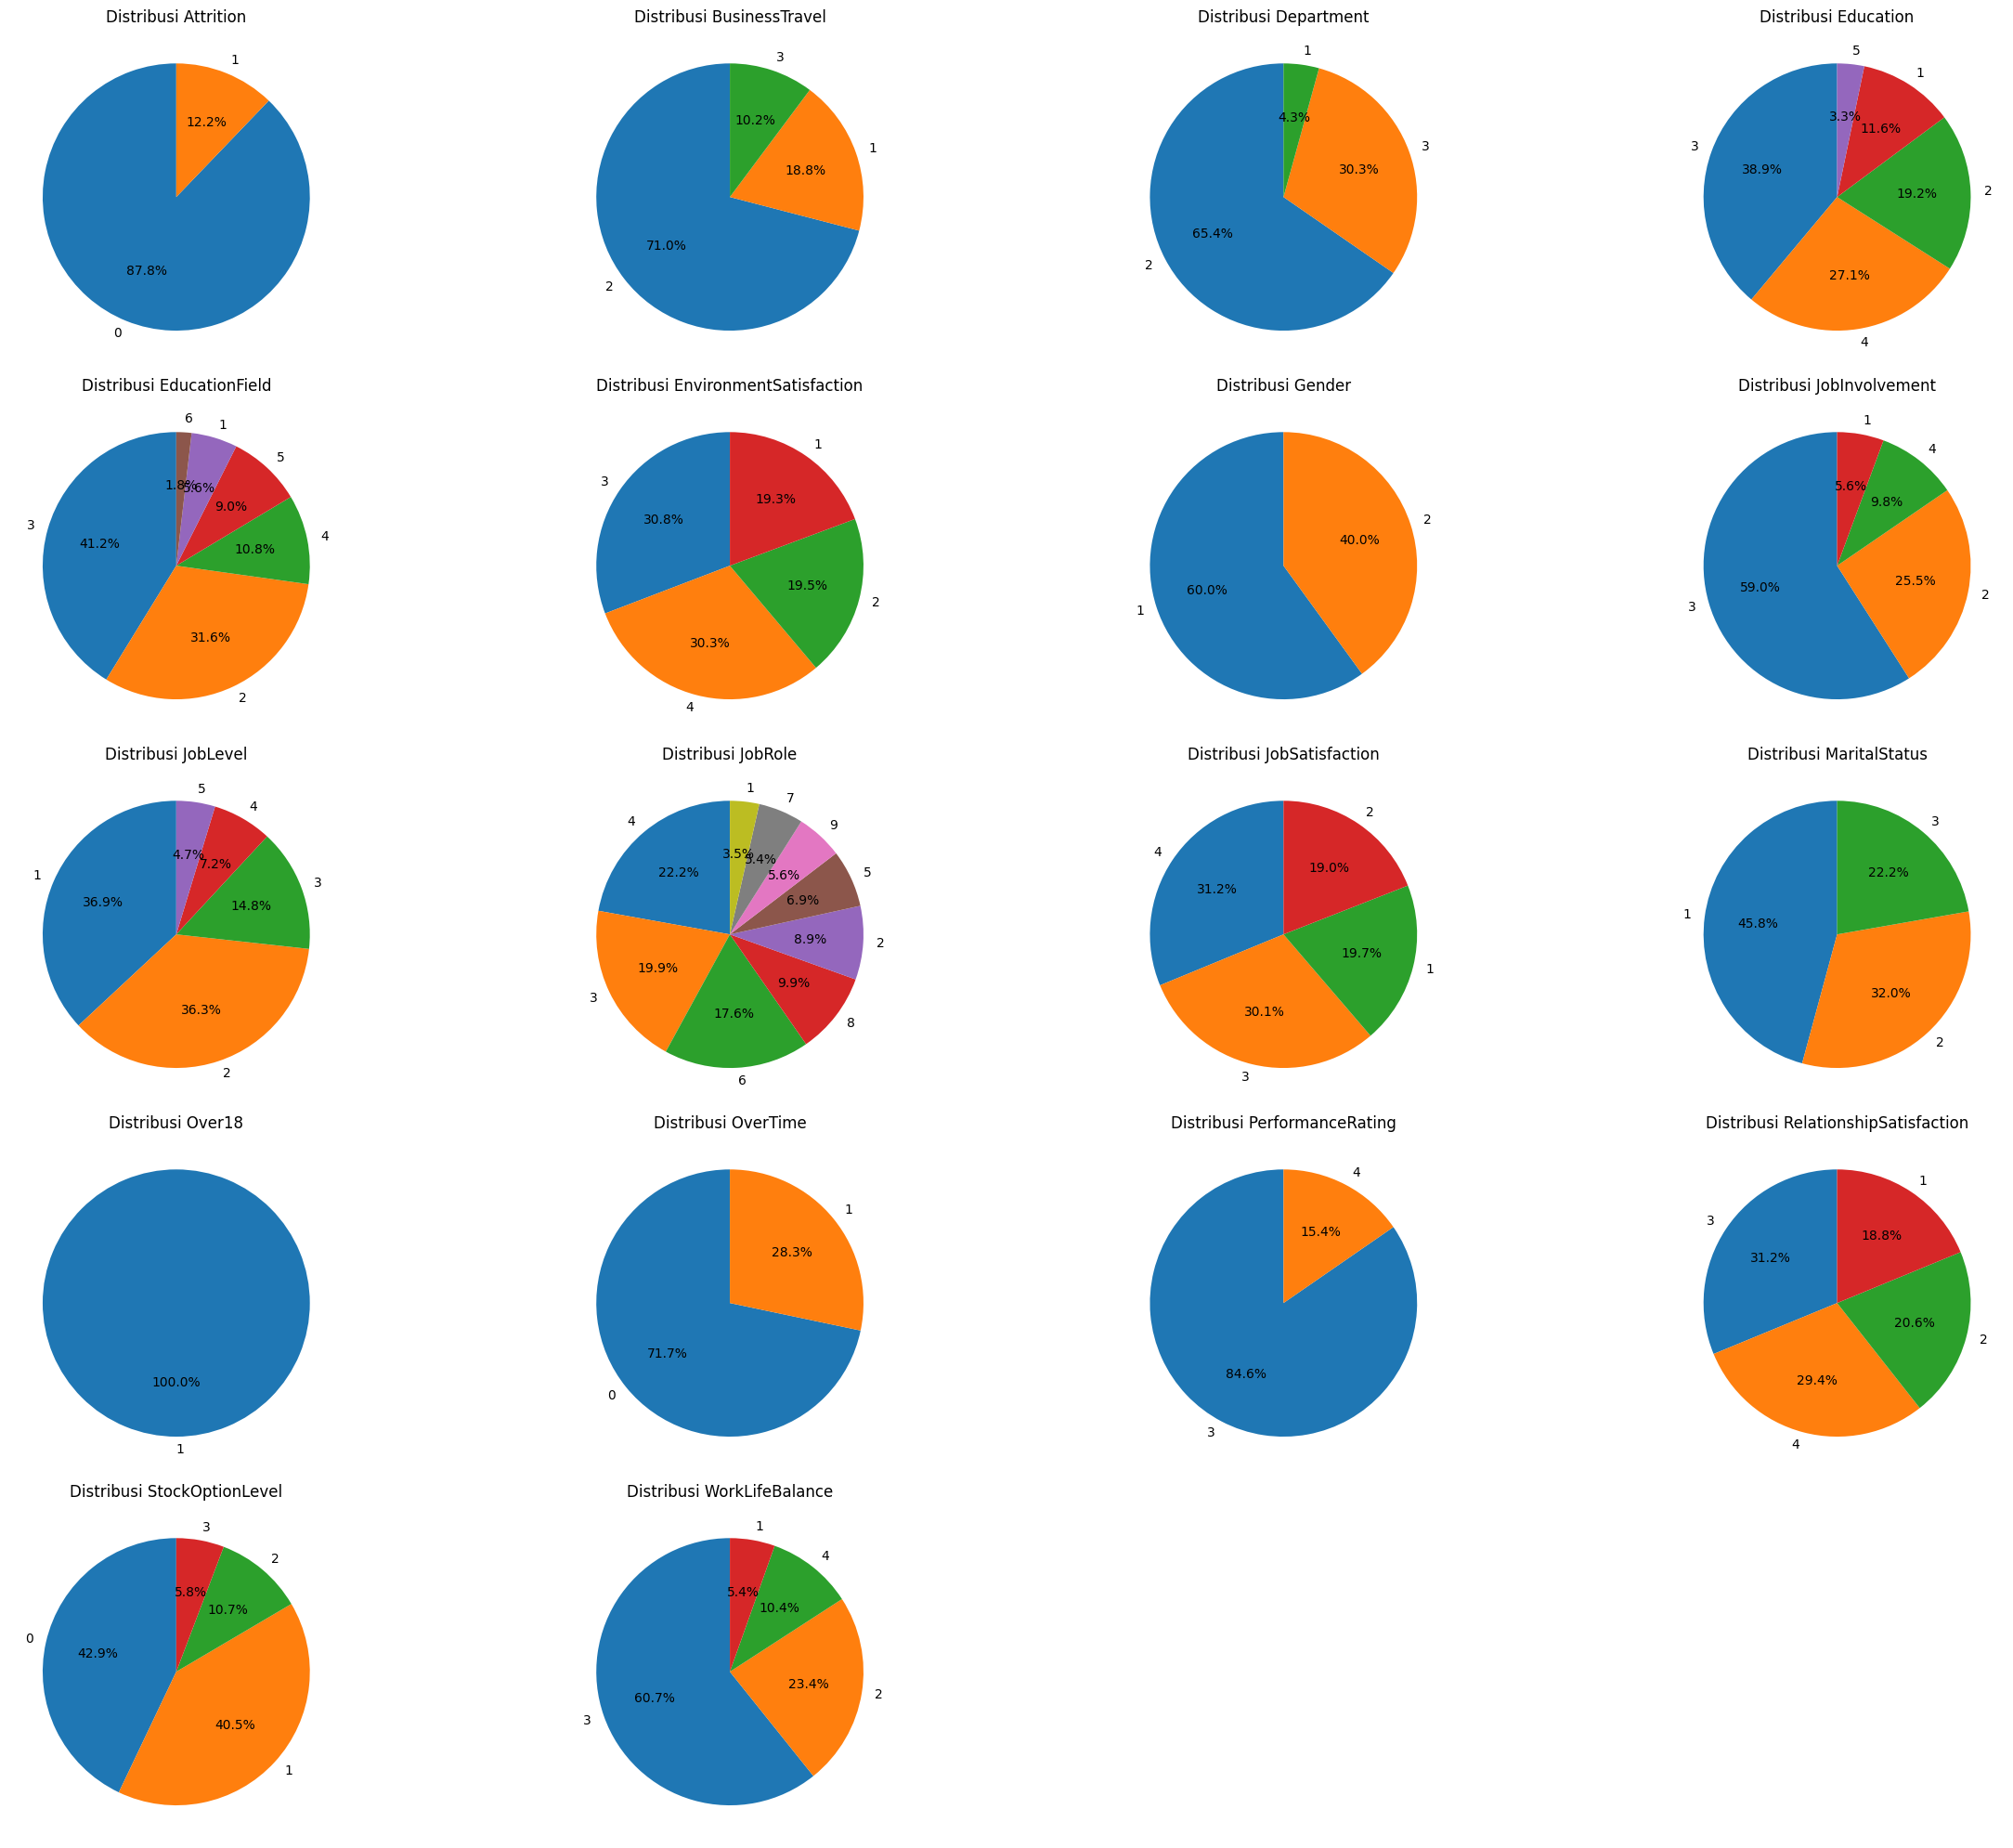

In [152]:
def plot_categorical_pie_charts(df, categorical_cols, cols_per_row=4):
    n_cols = len(categorical_cols)
    n_rows = int(np.ceil(n_cols / cols_per_row))

    fig, axes = plt.subplots(nrows=n_rows, ncols=cols_per_row, figsize=(cols_per_row * 6, n_rows * 4))

    for i, col in enumerate(categorical_cols):
        row_idx = i // cols_per_row
        col_idx = i % cols_per_row

        if n_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]

        # Menghitung frekuensi setiap kategori
        counts = df[col].value_counts()
        labels = counts.index
        sizes = counts.values

        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Distribusi {col}')

    # Hapus subplot kosong jika ada
    if n_cols < n_rows * cols_per_row:
        for j in range(n_cols, n_rows * cols_per_row):
            if n_rows > 1:
                fig.delaxes(axes.flatten()[j])
            else:
                fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan diagram pie dalam grid
plot_categorical_pie_charts(df, categorical_cols)

In [153]:
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations  # Untuk membuat pasangan kolom

def chi_square_test_all_categorical(df, categorical_cols):
    for col1, col2 in combinations(categorical_cols, 2):
        if col1 not in df.columns or col2 not in df.columns:
            print(f"Peringatan: Salah satu atau kedua kolom '{col1}' atau '{col2}' tidak ditemukan. Melewati pasangan ini.")
            continue  # Lewati pasangan kolom ini

        print(f"\n--- Uji Chi-Square antara '{col1}' dan '{col2}' ---")
        cross_tab = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = chi2_contingency(cross_tab)

        print("Chi-Square Statistic:", chi2)
        print("P-value:", p)
        print("Degrees of Freedom:", dof)

        alpha = 0.05
        if p < alpha:
            print(f"Kesimpulan: Ada hubungan yang signifikan antara '{col1}' dan '{col2}'.")
        else:
            print(f"Kesimpulan: Tidak ada cukup bukti untuk menyimpulkan adanya hubungan antara '{col1}' dan '{col2}'.")

chi_square_test_all_categorical(df, categorical_cols)


--- Uji Chi-Square antara 'Attrition' dan 'BusinessTravel' ---
Chi-Square Statistic: 14.256448978440446
P-value: 0.000802142336252969
Degrees of Freedom: 2
Kesimpulan: Ada hubungan yang signifikan antara 'Attrition' dan 'BusinessTravel'.

--- Uji Chi-Square antara 'Attrition' dan 'Department' ---
Chi-Square Statistic: 4.257275775907939
P-value: 0.11899927385429546
Degrees of Freedom: 2
Kesimpulan: Tidak ada cukup bukti untuk menyimpulkan adanya hubungan antara 'Attrition' dan 'Department'.

--- Uji Chi-Square antara 'Attrition' dan 'Education' ---
Chi-Square Statistic: 5.9213012536068055
P-value: 0.20510313776048292
Degrees of Freedom: 4
Kesimpulan: Tidak ada cukup bukti untuk menyimpulkan adanya hubungan antara 'Attrition' dan 'Education'.

--- Uji Chi-Square antara 'Attrition' dan 'EducationField' ---
Chi-Square Statistic: 11.255130570897595
P-value: 0.04654968193318255
Degrees of Freedom: 5
Kesimpulan: Ada hubungan yang signifikan antara 'Attrition' dan 'EducationField'.

--- Uji C

###Analisis Bivariate

**KATEGORIKAL VS 'Attration'**

Adapun untuk kolom kategorikal dan 'Attration' sudah dilakukan pada analisis Univariate kategorikal vs kategorikal sehingga sekarang perlu dilakukan penghapusan kolom yang tidak ada hubungan dengan 'Attration'.

In [154]:
kolom_yang_dihapus = [
    'Department',
    'Education',
    'Gender',
    'Over18',
    'PerformanceRating',
    'RelationshipSatisfaction'
]

# Menghapus kolom-kolom tersebut dari DataFrame
df = df.drop(columns=kolom_yang_dihapus, errors='ignore')

df.columns

Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'DistanceFromHome', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**NUMERIKAL VS 'Attration'**

Akan digunakan uji t-test karena dapat melakukan korelasi untuk data kategorikal biner dengan numerik dengan banyak data numerik.

In [155]:
import pandas as pd
from scipy import stats

def t_test_attrition_numerical(df, numerical_cols, attrition_col='Attrition'):
    if attrition_col not in df.columns:
        print(f"Kolom '{attrition_col}' tidak ditemukan dalam DataFrame.")
        return

    attrition_values = df[attrition_col].unique()
    if len(attrition_values) != 2:
        print(f"Kolom '{attrition_col}' harus memiliki tepat dua kategori untuk t-test. Ditemukan: {attrition_values}")
        return

    group1 = df[df[attrition_col] == attrition_values[0]]
    group2 = df[df[attrition_col] == attrition_values[1]]

    print(f"Melakukan t-test antara '{attrition_col}' ({attrition_values[0]} vs {attrition_values[1]}) dan kolom numerik:\n")

    results = {}
    for col in numerical_cols:
        if col in df.columns:
            t_statistic, p_value = stats.ttest_ind(group1[col], group2[col], nan_policy='omit')
            results[col] = {'t_statistic': t_statistic, 'p_value': p_value}
            alpha = 0.05
            if p_value < alpha:
                significance = "signifikan"
            else:
                significance = "tidak signifikan"
            print(f"- {col}: t = {t_statistic:.3f}, p = {p_value:.3f} (Perbedaan rata-rata {significance})")
        else:
            print(f"- Kolom '{col}' tidak ditemukan dalam DataFrame.")

    return results


results_ttest = t_test_attrition_numerical(df.copy(), numerical_cols)
print(results_ttest)

Melakukan t-test antara 'Attrition' (0 vs 1) dan kolom numerik:

- Age: t = 5.451, p = 0.000 (Perbedaan rata-rata signifikan)
- DailyRate: t = 1.415, p = 0.157 (Perbedaan rata-rata tidak signifikan)
- DistanceFromHome: t = -2.074, p = 0.038 (Perbedaan rata-rata signifikan)
- EmployeeCount: t = nan, p = nan (Perbedaan rata-rata tidak signifikan)
- HourlyRate: t = 0.728, p = 0.467 (Perbedaan rata-rata tidak signifikan)
- MonthlyIncome: t = 4.983, p = 0.000 (Perbedaan rata-rata signifikan)
- MonthlyRate: t = -0.638, p = 0.524 (Perbedaan rata-rata tidak signifikan)
- NumCompaniesWorked: t = -1.275, p = 0.203 (Perbedaan rata-rata tidak signifikan)
- PercentSalaryHike: t = 0.055, p = 0.956 (Perbedaan rata-rata tidak signifikan)
- StandardHours: t = nan, p = nan (Perbedaan rata-rata tidak signifikan)
- TotalWorkingYears: t = 5.540, p = 0.000 (Perbedaan rata-rata signifikan)
- TrainingTimesLastYear: t = 1.862, p = 0.063 (Perbedaan rata-rata tidak signifikan)
- YearsAtCompany: t = 4.262, p = 0.

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Insight:
- Signifikan: Kolom seperti 'Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', dan 'YearsWithCurrManager' menunjukkan perbedaan rata-rata yang signifikan antara karyawan yang attrition dan yang tidak. Misalnya, rata-rata usia karyawan yang attrition mungkin berbeda secara signifikan dari rata-rata usia karyawan yang tidak attrition.

- Tidak Signifikan: Kolom seperti 'DailyRate','EmployeeCount', 'HourlyRate', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours','TrainingTimesLastYear', dan 'YearsSinceLastPromotion' tidak menunjukkan perbedaan rata-rata yang signifikan antara kedua kelompok attrition. Ini berarti rata-rata nilai-nilai pada kolom ini relatif serupa antara karyawan yang keluar dan yang tidak.

- Untuk 'EmployeeCount' dan 'StandardHours' yang p-value dan t-statisticnya 'nan', ini kemungkinan karena kolom-kolom tersebut memiliki varians nol (semua nilainya sama) dalam salah satu atau kedua kelompok, sehingga perhitungan t-test tidak dapat dilakukan dengan baik.

In [156]:
print(df['EmployeeCount'].value_counts())
print(df['StandardHours'].value_counts())

EmployeeCount
1    1470
Name: count, dtype: int64
StandardHours
80    1470
Name: count, dtype: int64


In [157]:
kolom_yang_dihapus1 = [
    'DailyRate',
    'EmployeeCount',
    'HourlyRate',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'StandardHours',
    'TrainingTimesLastYear',
    'YearsSinceLastPromotion'
]

# Menghapus kolom-kolom tersebut dari DataFrame
df = df.drop(columns=kolom_yang_dihapus1, errors='ignore')

df.columns

Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')

In [158]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,1,38,0,1,1,1,4,3,1,1,2,1,2991,1,1,7,3,6,2,2
1,2,37,1,2,11,2,1,1,2,2,2,1,4777,0,0,15,1,1,0,0
2,3,51,1,2,4,3,1,3,1,3,3,1,2461,1,3,18,4,10,0,7
3,4,42,0,1,26,4,3,3,4,4,2,1,13525,0,1,23,4,20,4,8
4,5,40,0,2,2,2,3,3,1,3,3,1,2001,0,3,20,3,5,3,2


Diperoleh dari 34 kolom menjadi 19 kolom yang punya keterkaitan dengan kolom 'Attration'.

## Modeling

###Pemilihan Target dan Fitur

In [159]:
target_var = ['Attrition']
feature_var = [
    'Age',
    'BusinessTravel',
    'DistanceFromHome',
    'EducationField',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobLevel',
    'JobRole',
    'JobSatisfaction',
    'MaritalStatus',
    'MonthlyIncome',
    'OverTime',
    'StockOptionLevel',
    'TotalWorkingYears',
    'WorkLifeBalance',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsWithCurrManager'
]

### Ubah data menjadi numerik semua

In [160]:
gabungan_var = target_var + feature_var

In [161]:
def convert_to_int(df, gabungan_var):
    for col in gabungan_var:
        if col in df.columns:
            try:
                # Check if the column dtype is 'category' before converting
                if df[col].dtype.name == 'category':
                    df[col] = df[col].cat.codes # Convert category to numerical codes
                df[col] = df[col].astype(int)
            except ValueError:
                print(f"Tidak dapat mengubah kolom '{col}' menjadi int. Kolom '{col}' mungkin berisi data non-numerik setelah penanganan awal.")
        else:
            print(f"Kolom '{col}' tidak ditemukan dalam DataFrame.")

convert_to_int(df, gabungan_var)

print(df.dtypes)

EmployeeId                 int64
Age                        int64
Attrition                  int64
BusinessTravel             int64
DistanceFromHome           int64
EducationField             int64
EnvironmentSatisfaction    int64
JobInvolvement             int64
JobLevel                   int64
JobRole                    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
OverTime                   int64
StockOptionLevel           int64
TotalWorkingYears          int64
WorkLifeBalance            int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsWithCurrManager       int64
dtype: object


In [162]:
def standardize_data(df, feature_var, target_var='Attrition'):
    X = df[feature_var]
    y = df[target_var]

    # Bagi data menjadi train dan test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi StandardScaler
    scaler = StandardScaler()

    # Fit scaler hanya pada data latih
    X_train_scaled = scaler.fit_transform(X_train)

    # Transformasikan data uji menggunakan scaler yang sama
    X_test_scaled = scaler.transform(X_test)

    # Ubah kembali ke DataFrame (opsional, tergantung kebutuhan Anda)
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    return X_train_scaled_df, X_test_scaled_df, y_train, y_test

X_train_scaled, X_test_scaled, y_train, y_test = standardize_data(df.copy(), feature_var, target_var)

print("Data Latih yang Distandarisasi:")
print(X_train_scaled.head())
print("\nData Uji yang Distandarisasi:")
print(X_test_scaled.head())
print("\nTarget Latih:")
print(y_train.head())
print("\nTarget Uji:")
print(y_test.head())

Data Latih yang Distandarisasi:
           Age  BusinessTravel  DistanceFromHome  EducationField  \
1097 -0.875386        0.167759          1.314704        1.001169   
727  -0.875386        0.167759         -0.887009       -0.861765   
254  -0.543946        2.064731          2.415561       -0.861765   
1175  0.118935        0.167759          2.415561        1.932636   
1341  0.118935       -1.729212         -0.275422        0.069702   

      EnvironmentSatisfaction  JobInvolvement  JobLevel   JobRole  \
1097                 1.179676        0.385651 -0.051691 -0.347843   
727                 -1.544078       -1.005532 -0.051691 -0.347843   
254                  1.179676        0.385651 -0.972725  0.588229   
1175                 1.179676        0.385651 -0.051691  1.524301   
1341                 1.179676        1.776834 -0.972725 -0.815879   

      JobSatisfaction  MaritalStatus  MonthlyIncome  OverTime  \
1097         1.132546       1.572602       0.096989 -0.623241   
727         -0

###Penanganan Outlier

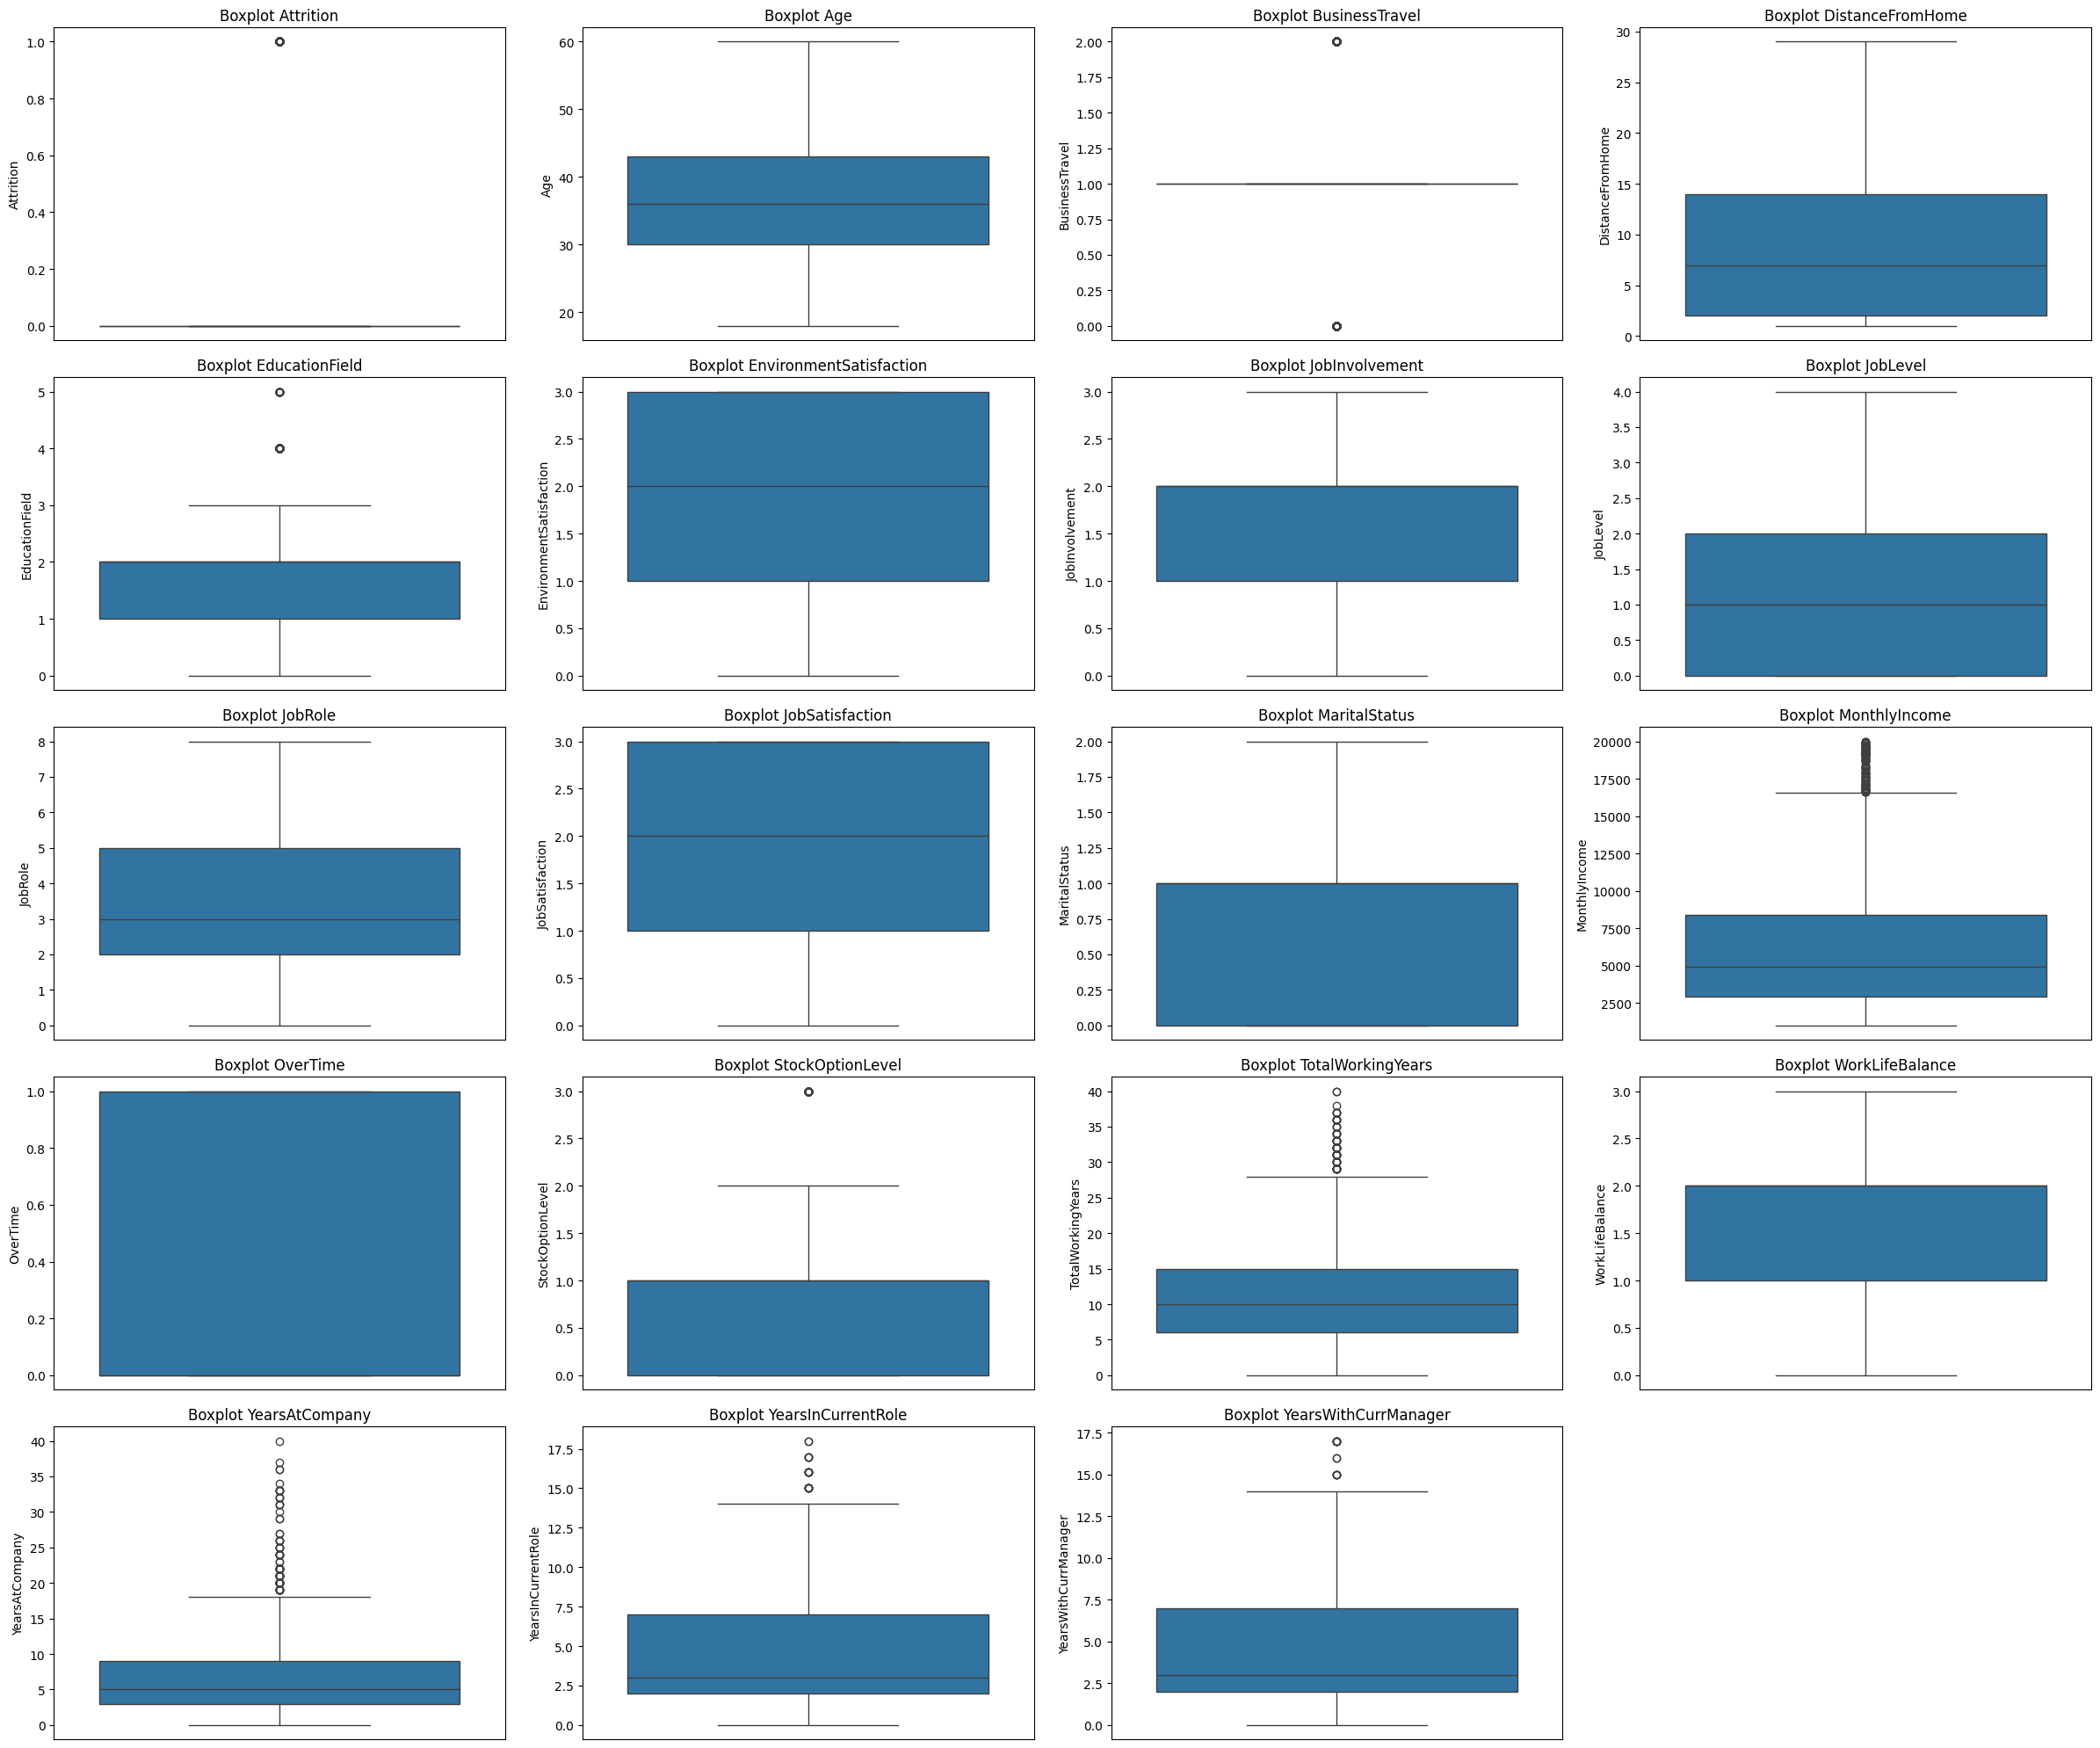

In [163]:
def plot_numerical_boxplots(df, numerical_cols, cols_per_row=4):
    n_cols = len(numerical_cols)
    n_rows = int(np.ceil(n_cols / cols_per_row))

    fig, axes = plt.subplots(nrows=n_rows, ncols=cols_per_row, figsize=(cols_per_row * 6, n_rows * 4))

    for i, col in enumerate(numerical_cols):
        row_idx = i // cols_per_row
        col_idx = i % cols_per_row

        if n_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]

        sns.boxplot(y=df[col], ax=ax)
        ax.set_title(f'Boxplot {col}')
        ax.set_ylabel(col)
        ax.set_xlabel('')
        ax.set_xticks([])

    if n_cols < n_rows * cols_per_row:
        for j in range(n_cols, n_rows * cols_per_row):
            if n_rows > 1:
                fig.delaxes(axes.flatten()[j])
            else:
                fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_numerical_boxplots(df.copy(), gabungan_var)

'EducationField' karena kategorikal jadi jangan diubah nilainya.

'MonthlyIncome' karena ini merupakan gaji sehingga wajar jika ada yang tinggi diantara yang lain.

'StockOptionLevel' karena kategorikal jadi jangan diubah nilainya.

'TotalWorkingYears' karena ini merupakan total tahun bekerja sehingga wajar jika ada yang nilainya kecil dan besar diantara yang lain.

'YearsAtCompany' karena ini merupakan tahun bekerja sehingga wajar jika ada yang nilainya kecil dan besar diantara yang lain.

'YearsInCurrentRole' karena ini merupakan tahun dalam peran saat ini sehingga wajar jika ada yang nilainya kecil dan besar diantara yang lain.

'YearsWithCurrManager' karena ini merupakan tahun bersama manajer saat ini sehingga wajar jika ada yang nilainya kecil dan besar diantara yang lain.

###Pemilihan Model

In [164]:
# Inisialisasi model-model yang akan dicoba
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

results = {}

# Latih dan evaluasi setiap model
for name, model in models.items():
    # Latih model
    model.fit(X_train_scaled, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test_scaled)

    # Hitung akurasi
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Buat DataFrame untuk menampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])

# Cetak tabel hasil
print("\nPerbandingan Akurasi Model:")
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Perbandingan Akurasi Model:
                     Accuracy
Logistic Regression  0.897959
Random Forest        0.901361
XGBoost              0.863946


In [165]:
def tune_and_evaluate_random_forest(X_train, y_train, X_test, y_test):
    # Parameter yang akan di-tune
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }

    # Inisialisasi GridSearchCV
    grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_grid=param_grid,
                               cv=3,
                               scoring='accuracy',
                               verbose=1,
                               n_jobs=-1)

    # Lakukan Grid Search pada data latih
    grid_search.fit(X_train, y_train)

    # Parameter terbaik
    best_params = grid_search.best_params_
    print("Parameter Terbaik:", best_params)

    # Model terbaik
    best_model = grid_search.best_estimator_

    # Lakukan prediksi pada data uji menggunakan model terbaik
    y_pred_best = best_model.predict(X_test)

    # Evaluasi model terbaik
    classification_rep = classification_report(y_test, y_pred_best, target_names=['No Attrition', 'Attrition'])
    confusion_mat = confusion_matrix(y_test, y_pred_best)
    accuracy = accuracy_score(y_test, y_pred_best)

    print("\nClassification Report Terbaik:")
    print(classification_rep)

    print("\nConfusion Matrix Terbaik:")
    print(confusion_mat)

    print(f"\nAkurasi Model Terbaik: {accuracy:.4f}")

    return best_model, best_params, classification_rep, confusion_mat, accuracy


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Panggil fungsi tuning dan evaluasi
best_model, best_params, classification_rep, confusion_mat, accuracy = tune_and_evaluate_random_forest(
    X_train_scaled, y_train, X_test_scaled, y_test
)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Parameter Terbaik: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

Classification Report Terbaik:
              precision    recall  f1-score   support

No Attrition       0.89      1.00      0.94       262
   Attrition       0.50      0.03      0.06        32

    accuracy                           0.89       294
   macro avg       0.70      0.51      0.50       294
weighted avg       0.85      0.89      0.85       294


Confusion Matrix Terbaik:
[[261   1]
 [ 31   1]]

Akurasi Model Terbaik: 0.8912


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## Evaluation

Classification Report:
               precision    recall  f1-score   support

No Attrition       0.89      1.00      0.94       262
   Attrition       0.50      0.03      0.06        32

    accuracy                           0.89       294
   macro avg       0.70      0.51      0.50       294
weighted avg       0.85      0.89      0.85       294

Confusion Matrix:
 [[261   1]
 [ 31   1]]
Accuracy: 0.891156462585034
AUC: 0.7682490458015268


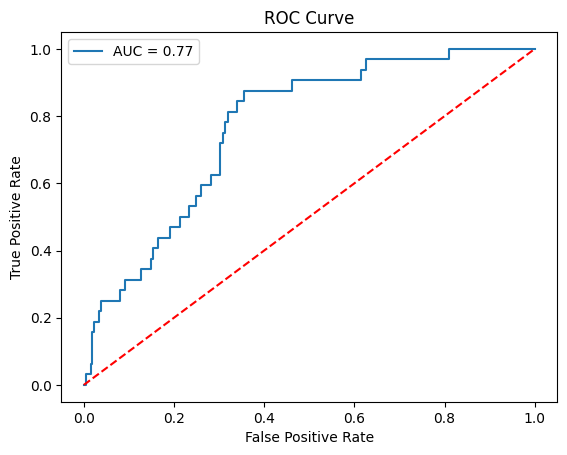

In [166]:
# Prediksi pada data uji yang telah diskalakan
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # Probabilitas untuk kelas positif ('Attrition')

# Evaluasi
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['No Attrition', 'Attrition']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# ROC AUC
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

# Kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Garis acak
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Insight:

Nilai AUC sebesar 0.77 menunjukkan bahwa model  memiliki kemampuan yang cukup baik dalam membedakan antara karyawan yang akan mengalami attrition dan yang tidak. Ada peluang 77% bahwa model akan memberikan peringkat yang lebih tinggi pada karyawan yang benar-benar mengalami attrition dibandingkan dengan karyawan yang tidak, secara acak.

#Persiapan Data Untuk Dashboard

In [167]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,1,38,0,0,1,0,3,2,0,0,1,0,2991,1,1,7,2,6,2,2
1,2,37,1,1,11,1,0,0,1,1,1,0,4777,0,0,15,0,1,0,0
2,3,51,1,1,4,2,0,2,0,2,2,0,2461,1,3,18,3,10,0,7
3,4,42,0,0,26,3,2,2,3,3,1,0,13525,0,1,23,3,20,4,8
4,5,40,0,1,2,1,2,2,0,2,2,0,2001,0,3,20,2,5,3,2


In [168]:
df['Attrition'] = df['Attrition'].map({0:'No', 1:'Yes'})

In [169]:
df['BusinessTravel'] = df['BusinessTravel'].map({0:'Travel_Frequently', 1:'Travel_Rarely', 2:'Non-Travel'})

In [170]:
df['EducationField'] = df['EducationField'].map({0:'Other', 1:'Medical', 2:'Life Sciences', 3:'Marketing', 4:'Technical Degree', 5:'Human Resources'})

In [171]:
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map({0:'Low', 1:'Medium', 2:'High', 3:'Very High'})

In [172]:
df['JobInvolvement'] = df['JobInvolvement'].map({0:'Low', 1:'Medium', 2:'High', 3:'Very High'})

In [173]:
df['JobRole'] = df['JobRole'].map({0:'Human Resources', 1:'Healthcare Representative', 2:'Research Scientist', 3:'Sales Executive', 4:'Manager', 5:'Laboratory Technician', 6:'Research Director', 7:'Manufacturing Director', 8:'Sales Representative'})

In [174]:
df['JobSatisfaction'] = df['JobSatisfaction'].map({0:'Low', 1:'Medium', 2:'High', 3:'Very High'})

In [175]:
df['MaritalStatus'] = df['MaritalStatus'].map({0:'Married', 1:'Single', 2:'Divorced'})

In [176]:
df['OverTime'] = df['OverTime'].map({0:'No', 1:'Yes'})

In [177]:
df['WorkLifeBalance'] = df['WorkLifeBalance'].map({0:'Low', 1:'Good', 2:'Excellent', 3:'Outstanding'})

In [178]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,1,38,No,Travel_Frequently,1,Other,Very High,High,0,Human Resources,Medium,Married,2991,Yes,1,7,Excellent,6,2,2
1,2,37,Yes,Travel_Rarely,11,Medical,Low,Low,1,Healthcare Representative,Medium,Married,4777,No,0,15,Low,1,0,0
2,3,51,Yes,Travel_Rarely,4,Life Sciences,Low,High,0,Research Scientist,High,Married,2461,Yes,3,18,Outstanding,10,0,7
3,4,42,No,Travel_Frequently,26,Marketing,High,High,3,Sales Executive,Medium,Married,13525,No,1,23,Outstanding,20,4,8
4,5,40,No,Travel_Rarely,2,Medical,High,High,0,Research Scientist,High,Married,2001,No,3,20,Excellent,5,3,2


In [179]:
nama_file_csv = 'hasil_analisis.csv'
df.to_csv(nama_file_csv, index=False)
print(f"DataFrame berhasil disimpan ke '{nama_file_csv}'")

DataFrame berhasil disimpan ke 'hasil_analisis.csv'
